In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import re
import json
from pandas.io.json import json_normalize
from IPython.display import display
from pandas import HDFStore,DataFrame
import pandas as pd
import pickle

%matplotlib inline 

## Open files and read in inputs for dataset popularity

## These files contain all datasets that have been accessed in a given week 

- point 1. of google doc

https://docs.google.com/document/d/1G-Z2jDxHHz7b9xaOSx50cgiv72zZEBVA_QsqeU-c5Rg/edit

- Open weekly file with accessed datasets
- df_1w is a panda dataframe

https://pandas.pydata.org/pandas-docs/stable/10min.html
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

In [3]:
filename = '../Federica/DataPopularity_ML/simpleModel_start_2016-01-01_meas_7_pred_7'

df_1w = pd.read_hdf(filename+'.h5', 'X')

display(df_1w.shape)

(11302, 14)

In [211]:
#check what it looks like
display(df_1w.head(5)) 

,name,scope,user,taskid,cputime,pandaid,size,nfiles,site,walltime,nevents,dsid,ptag,type
0,data12_8TeV.00202712.physics_Bphysics.merge.DA...,data12_8TeV,1,1,7208,11,43389319013,13,1,13684,209256,202712,1425,DAOD_JPSIMUMU
1,data12_8TeV.00202740.physics_Bphysics.merge.DA...,data12_8TeV,1,1,1854,1,10751529386,3,1,2536,47044,202740,1425,DAOD_JPSIMUMU
2,data12_8TeV.00202798.physics_Bphysics.merge.DA...,data12_8TeV,1,1,10124,2,74054089517,21,1,14041,362970,202798,1425,DAOD_JPSIMUMU
3,data12_8TeV.00202965.physics_Bphysics.merge.DA...,data12_8TeV,1,1,3665,1,35363904915,11,1,5235,172378,202965,1425,DAOD_JPSIMUMU
4,data12_8TeV.00202987.physics_Bphysics.merge.DA...,data12_8TeV,1,1,2503,1,19718220347,6,1,3510,92535,202987,1425,DAOD_JPSIMUMU


In [14]:
display(df_1w.tail(5))

,name,scope,user,taskid,cputime,pandaid,size,nfiles,site,walltime,nevents,dsid,ptag,type
11297,mc15_13TeV.423107.Pythia8EvtGen_A14NNPDF23LO_g...,mc15_13TeV,1,2,10766,2,27316055812,10,2,18602,184000,423107,2459,DAOD_JETM4
11298,mc15_13TeV.423108.Pythia8EvtGen_A14NNPDF23LO_g...,mc15_13TeV,2,2,12203,3,29700860546,10,2,13559,199000,423108,2459,DAOD_JETM4
11299,mc15_13TeV.423109.Pythia8EvtGen_A14NNPDF23LO_g...,mc15_13TeV,1,2,12474,2,29539711120,8,2,14444,196600,423109,2459,DAOD_JETM4
11300,mc15_13TeV.423112.Pythia8EvtGen_A14NNPDF23LO_g...,mc15_13TeV,1,2,1534,2,8062768878,2,2,2543,195396,423112,2470,DAOD_SUSY7
11301,mc15_13TeV.426051.HerwigppEvtGen_UEEE5_CTEQ6L1...,mc15_13TeV,1,1,11756,2,24530679032,7,1,13621,418498,426051,2419,DAOD_SUSY1


In [15]:
#Explore the data
display(df_1w.columns)
display(df_1w.dtypes)
display(df_1w.values)

Index(['name', 'scope', 'user', 'taskid', 'cputime', 'pandaid', 'size',
       'nfiles', 'site', 'walltime', 'nevents', 'dsid', 'ptag', 'type'],
      dtype='object')

name        object
scope       object
user         int64
taskid       int64
cputime      int64
pandaid      int64
size         int64
nfiles       int64
site         int64
walltime     int64
nevents      int64
dsid         int64
ptag         int64
type        object
dtype: object

array([[ 'data12_8TeV.00202712.physics_Bphysics.merge.DAOD_JPSIMUMU.r4065_p1278_p1424_p1425_tid01261289_00',
        'data12_8TeV', 1, ..., 202712, 1425, 'DAOD_JPSIMUMU'],
       [ 'data12_8TeV.00202740.physics_Bphysics.merge.DAOD_JPSIMUMU.r4065_p1278_p1424_p1425_tid01261259_00',
        'data12_8TeV', 1, ..., 202740, 1425, 'DAOD_JPSIMUMU'],
       [ 'data12_8TeV.00202798.physics_Bphysics.merge.DAOD_JPSIMUMU.r4065_p1278_p1424_p1425_tid01261265_00',
        'data12_8TeV', 1, ..., 202798, 1425, 'DAOD_JPSIMUMU'],
       ..., 
       [ 'mc15_13TeV.423109.Pythia8EvtGen_A14NNPDF23LO_gammajet_DP1500_2000.merge.DAOD_JETM4.e4453_s2726_r6869_r6282_p2459_tid07098125_00',
        'mc15_13TeV', 1, ..., 423109, 2459, 'DAOD_JETM4'],
       [ 'mc15_13TeV.423112.Pythia8EvtGen_A14NNPDF23LO_gammajet_DP3000_inf.merge.DAOD_SUSY7.e4453_s2726_r6869_r6282_p2470_tid07168310_00',
        'mc15_13TeV', 1, ..., 423112, 2470, 'DAOD_SUSY7'],
       [ 'mc15_13TeV.426051.HerwigppEvtGen_UEEE5_CTEQ6L1_jetjet_JZ11W.merg

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f014c827748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f014c54c1d0>]], dtype=object)

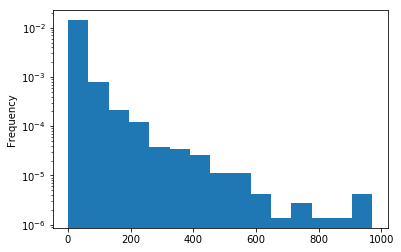

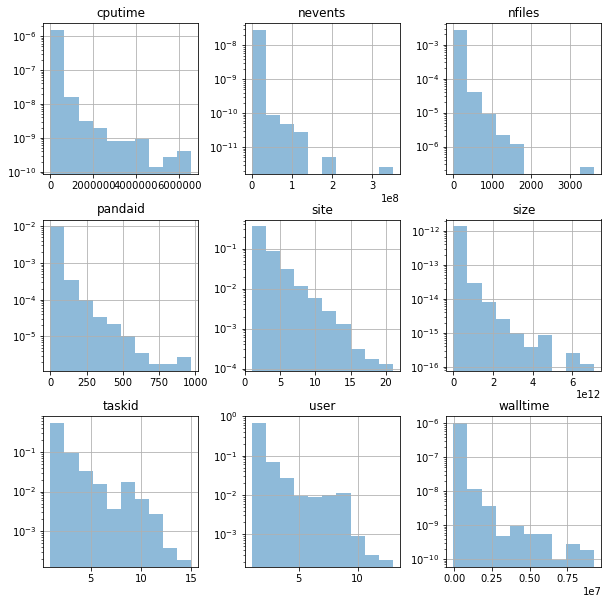

In [16]:
#make some plots
plt.figure();
df_1w.pandaid.plot.hist(bins=15, normed = True)
plt.yscale('log')

plt.figure()
df_1w[['user', 'taskid', 'cputime', 'pandaid', 'size', 
    'nfiles', 'site', 'walltime', 'nevents']].hist(alpha=0.5, bins=10, figsize=(10, 10), log = True, normed = True)

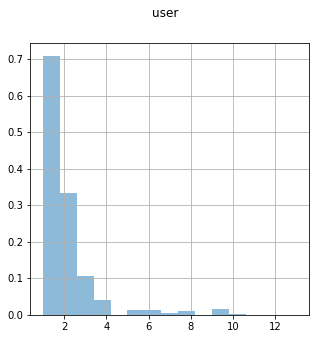

In [17]:
plt.figure()
df_1w['user'].hist(alpha=0.5, bins=15, figsize=(5, 5), normed = 1)
plt.suptitle('user')

## Example: open another week of data and merge with first one

In [2]:
#merge dataframes used for popularity measurement (used for inputs) -> gets the integral of distributions

def mergeDF(df, df_new):
    #print('Before')
    #display(df.shape)
    concatenated = pd.concat([df, df_new]) 
    #print('After')
    
    #drop date, sum over pandaids, sites, users, ...
    result = concatenated.groupby(['name','scope','dsid','ptag','type']).agg({"pandaid": np.sum, "user": np.sum,  "site": np.sum,
        "taskid": pd.Series.sum, "cputime": pd.Series.sum, "walltime": pd.Series.sum, "nevents": pd.Series.sum, 
        "nfiles": pd.Series.sum, "size": pd.Series.sum   # sum over unique pandaids, taskids, sites, users. Get the total/day for all the rest  
    }).reset_index()
  
    #display(df_new.shape)
    #display(result.shape)
    
    return result

In [236]:
filename = '../Federica/DataPopularity_ML/simpleModel_start_2016-01-08_meas_7_pred_7'

df_2w = pd.read_hdf(filename+'.h5', 'X')
display(df_2w.shape)

df_merged = mergeDF(df_1w, df_2w)
display(df_merged.shape)
display(df_merged.head(5))

(16976, 14)

(21238, 14)

,name,scope,dsid,ptag,type,taskid,cputime,size,walltime,user,pandaid,nfiles,site,nevents
0,data12_8TeV.00202712.physics_Bphysics.merge.DA...,data12_8TeV,202712,1425,DAOD_JPSIMUMU,1,7208,43389319013,13684,1,11,13,1,209256
1,data12_8TeV.00202740.physics_Bphysics.merge.DA...,data12_8TeV,202740,1425,DAOD_JPSIMUMU,1,1854,10751529386,2536,1,1,3,1,47044
2,data12_8TeV.00202798.physics_Bphysics.merge.DA...,data12_8TeV,202798,1425,DAOD_JPSIMUMU,1,10124,74054089517,14041,1,2,21,1,362970
3,data12_8TeV.00202965.physics_Bphysics.merge.DA...,data12_8TeV,202965,1425,DAOD_JPSIMUMU,1,3665,35363904915,5235,1,1,11,1,172378
4,data12_8TeV.00202987.physics_Bphysics.merge.DA...,data12_8TeV,202987,1425,DAOD_JPSIMUMU,1,2503,19718220347,3510,1,1,6,1,92535


## These files contain all datasets that have been created from 1.1.2016 to 25.7.2017


## Unzip files --> do only once!

In [20]:
import os
import tarfile
import zipfile

path = 'daod_datasets_2016_2017.tar.gz'
path = 'deleted_daod_datasets_2016_2017.tar.gz'

opener, mode = tarfile.open, 'r:gz'

cwd = os.getcwd()
os.chdir('../Federica/DataPopularity_ML/')

try:
    file = opener(path, mode)
    try: file.extractall()
    finally: file.close()
finally:
    os.chdir(cwd)

## Define useful functions to manipulate dataset names

In [4]:
# get DSID from dataset name (as a int)
def getDSID(name):

    sub = name.split('.')
    #print(sub)

    dsid = sub[1]
    
    #remove 00 for data
    if (dsid.startswith('00')):
        dsid  = dsid[2:]
    #print(dsid)
    return(int(dsid))  

In [5]:
# get scope from dataset name
def getScope(name):

    sub = name.split('.')
    #print(sub)
    scope = sub[0]
    return(scope)  

In [6]:
# get ptag from dataset name (as a int)
def getPtag(name):

    sub = name.split('.')
    #print(sub)
    last = len(sub)
    tags = sub[last-1]
    #print(tags)
    ptag=0
    subtags = tags.split('_')
    #print(subtags)
    for i in subtags:
        if (i.startswith('p')): # takes always the last one
            ptag = int(i[1:])
            #print(i)
    return(ptag)      

In [7]:
# get Type from dataset name (DOAD_*)
def getType(name):

    sub = name.split('.')
    #print(sub)

    dstype = name
    for i in sub:
        if (i.startswith('DAOD_')): # takes always the last one
            dstype = i
    #print(dstype)
    return(dstype) 

## Datasets created from 1.1.2016 and not deleted (on 25/7/2017)

- point 2. of google doc
- format is scope, name, creation date and last access date (it’s 0 if never accessed). Date is in epoch second

In [25]:
df_not = pd.read_csv('../Federica/DataPopularity_ML/daod_datasets_2016_2017.csv', header = None, sep = '\t',
                     names = ['scope', 'name', 'creation', 'lastaccess'])
display(df_not.head(5))

#drop useless columns
df_not = df_not.drop('lastaccess', axis =1)

#dataset manipulation: convert date in epoch to readable datedate (remove time in hours, leave only dates)
df_not['creation'] = df_not['creation'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)).date())

#scope==archive are datasets on LOCALGROUPDSIK but not on DATADISK. Does not matter, let's replace with "real" scope 
df_not['scope'] = df_not['name'].apply(getScope)

# get a few others attributes
df_not['type'] = df_not['name'].apply(getType)
df_not['dsid'] = df_not['name'].apply(getDSID)
df_not['ptag'] = df_not['name'].apply(getPtag)

display(df_not.head(5))

,scope,name,creation,lastaccess
0,archive,data15_13TeV.00266904.physics_Main.merge.DAOD_...,1492789760,0
1,archive,data15_13TeV.00266919.physics_Main.merge.DAOD_...,1492789743,0
2,archive,data15_13TeV.00267073.physics_Main.merge.DAOD_...,1492789791,0
3,archive,data15_13TeV.00267152.physics_Main.merge.DAOD_...,1492789562,0
4,archive,data15_13TeV.00267162.physics_Main.merge.DAOD_...,1492789576,0


,scope,name,creation,type,dsid,ptag
0,data15_13TeV,data15_13TeV.00266904.physics_Main.merge.DAOD_...,2017-04-21,DAOD_EXOT15,266904,2614
1,data15_13TeV,data15_13TeV.00266919.physics_Main.merge.DAOD_...,2017-04-21,DAOD_EXOT15,266919,2614
2,data15_13TeV,data15_13TeV.00267073.physics_Main.merge.DAOD_...,2017-04-21,DAOD_EXOT15,267073,2614
3,data15_13TeV,data15_13TeV.00267152.physics_Main.merge.DAOD_...,2017-04-21,DAOD_EXOT15,267152,2614
4,data15_13TeV,data15_13TeV.00267162.physics_Main.merge.DAOD_...,2017-04-21,DAOD_EXOT15,267162,2614


## Datasets created from 1.1.2016 and already deleted (on 25/7/2017)

- point 3 of googledoc
- scope, name, creation date, deletion date, last access date (in ISO format)

In [26]:
df_del = pd.read_csv('../Federica/DataPopularity_ML/deleted_daod_datasets_2016_2017.csv', header = None, sep = '\t',
                     names = ['scope', 'name', 'creation', 'deletion', 'lastaccess'])
display(df_del.head(5))

#drop useless columns
df_del = df_del.drop('lastaccess', axis =1)
df_del = df_del.drop('deletion', axis =1)

#dataset manipulation: remove time in hours, leave only dates
df_del['creation'] = df_del['creation'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%SZ").date())

#scope==archive are datasets on LOCALGROUPDSIK but not on DATADISK. Does not matter, let's replace with "real" scope 
df_del['scope'] = df_del['name'].apply(getScope)

# get a few others attributes
df_del['type'] = df_del['name'].apply(getType)
df_del['dsid'] = df_del['name'].apply(getDSID)
df_del['ptag'] = df_del['name'].apply(getPtag)

display(df_del.head(5))

,scope,name,creation,deletion,lastaccess
0,mc12_14TeV,mc12_14TeV.167792.Sherpa_CT10_WmunuMassiveCBPt...,2016-06-02T16:02:59Z,2016-06-07T08:12:26Z,NaN
1,mc12_14TeV,mc12_14TeV.167790.Sherpa_CT10_WenuMassiveCBPt5...,2016-06-02T15:58:59Z,2016-06-07T08:12:54Z,NaN
2,mc12_14TeV,mc12_14TeV.161963.Sherpa_CT10_llnunu_ZZ.merge....,2016-05-15T22:37:50Z,2016-05-23T13:48:02Z,NaN
3,mc12_14TeV,mc12_14TeV.167771.Sherpa_CT10_WenuMassiveCBPt1...,2016-06-02T15:45:18Z,2016-06-06T08:31:23Z,NaN
4,mc12_14TeV,mc12_14TeV.167779.Sherpa_CT10_WenuMassiveCBPt2...,2016-06-02T15:51:35Z,2016-06-06T08:31:23Z,NaN


,scope,name,creation,type,dsid,ptag
0,mc12_14TeV,mc12_14TeV.167792.Sherpa_CT10_WmunuMassiveCBPt...,2016-06-02,DAOD_TRUTH1,167792,2613
1,mc12_14TeV,mc12_14TeV.167790.Sherpa_CT10_WenuMassiveCBPt5...,2016-06-02,DAOD_TRUTH1,167790,2613
2,mc12_14TeV,mc12_14TeV.161963.Sherpa_CT10_llnunu_ZZ.merge....,2016-05-15,DAOD_TRUTH1,161963,2613
3,mc12_14TeV,mc12_14TeV.167771.Sherpa_CT10_WenuMassiveCBPt1...,2016-06-02,DAOD_TRUTH1,167771,2613
4,mc12_14TeV,mc12_14TeV.167779.Sherpa_CT10_WenuMassiveCBPt2...,2016-06-02,DAOD_TRUTH1,167779,2613


In [27]:
# now merge them
display(df_del.shape)
display(df_not.shape)

concatenated = pd.concat([df_del, df_not])
display(concatenated.shape)
df_all = concatenated.drop_duplicates()
display(df_all.shape)

# There can still be duplicates based on name only in case one dataset was archived. 
# In this case the dataset name is the same, but creation date is different

(229038, 6)

(271123, 6)

(500161, 6)

(499938, 6)

## now df_all contains all datasets created from 1/1/2016 to 25/7/2017

- format is scope, name, creation date, type, dsid, ptag

In [5]:
df_2w = pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-01-08_meas_7_pred_7.h5', 'X')
display(df_2w.shape)

(16976, 14)

In [6]:
df_3w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-01-15_meas_7_pred_7.h5', 'X')

display(df_3w.shape)

(17087, 14)

In [7]:
df_4w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-01-22_meas_7_pred_7.h5', 'X')

display(df_4w.shape)

(16780, 14)

In [8]:
df_5w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-01-29_meas_7_pred_7.h5', 'X')

display(df_5w.shape)

(21948, 14)

In [9]:
df_6w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-02-05_meas_7_pred_7.h5', 'X')

display(df_6w.shape)

(18685, 14)

In [10]:
df_7w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-02-12_meas_7_pred_7.h5', 'X')

display(df_7w.shape)

(17035, 14)

In [11]:
df_8w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-02-19_meas_7_pred_7.h5', 'X')

In [12]:
df_9w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-02-26_meas_7_pred_7.h5', 'X')

In [13]:
df_10w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-03-04_meas_7_pred_7.h5', 'X')

In [14]:
df_11w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-03-11_meas_7_pred_7.h5', 'X')

In [15]:
df_12w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-03-18_meas_7_pred_7.h5', 'X')

In [16]:
df_13w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-03-25_meas_7_pred_7.h5', 'X')

In [17]:
df_14w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-04-01_meas_7_pred_7.h5', 'X')

In [18]:
df_15w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-04-08_meas_7_pred_7.h5', 'X')

In [19]:
df_16w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-04-15_meas_7_pred_7.h5', 'X')

In [20]:
df_17w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-04-22_meas_7_pred_7.h5', 'X')

In [21]:
df_18w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-04-29_meas_7_pred_7.h5', 'X')

In [22]:
df_19w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-05-06_meas_7_pred_7.h5', 'X')

In [23]:
df_20w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-05-13_meas_7_pred_7.h5', 'X')

In [24]:
df_21w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-05-20_meas_7_pred_7.h5', 'X')

In [25]:
df_22w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-05-27_meas_7_pred_7.h5', 'X')

In [26]:
df_23w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-06-03_meas_7_pred_7.h5', 'X')

In [27]:
df_24w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-06-10_meas_7_pred_7.h5', 'X')

In [28]:
df_25w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-06-17_meas_7_pred_7.h5', 'X')

In [29]:
df_26w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-06-24_meas_7_pred_7.h5', 'X')

In [30]:
df_27w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-07-01_meas_7_pred_7.h5', 'X')

In [31]:
df_28w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-07-08_meas_7_pred_7.h5', 'X')

In [32]:
df_29w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-07-15_meas_7_pred_7.h5', 'X')

In [33]:
df_30w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-07-22_meas_7_pred_7.h5', 'X')

In [34]:
df_31w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-07-29_meas_7_pred_7.h5', 'X')

In [35]:
df_32w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-08-05_meas_7_pred_7.h5', 'X')

In [36]:
df_33w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-08-12_meas_7_pred_7.h5', 'X')

In [37]:
df_34w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-08-19_meas_7_pred_7.h5', 'X')

In [38]:
df_35w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-08-26_meas_7_pred_7.h5', 'X')

In [39]:
df_36w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-09-02_meas_7_pred_7.h5', 'X')

In [40]:
df_37w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-09-09_meas_7_pred_7.h5', 'X')

In [41]:
df_38w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-09-16_meas_7_pred_7.h5', 'X')

In [42]:
df_39w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-09-23_meas_7_pred_7.h5', 'X')

In [43]:
df_40w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-09-30_meas_7_pred_7.h5', 'X')

In [44]:
df_41w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-10-07_meas_7_pred_7.h5', 'X')

In [45]:
df_42w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-10-14_meas_7_pred_7.h5', 'X')

In [46]:
df_43w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-10-21_meas_7_pred_7.h5', 'X')

In [47]:
df_44w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-10-28_meas_7_pred_7.h5', 'X')

In [48]:
df_45w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-11-04_meas_7_pred_7.h5', 'X')

In [49]:
df_46w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-11-11_meas_7_pred_7.h5', 'X')

In [50]:
df_47w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-11-18_meas_7_pred_7.h5', 'X')

In [51]:
df_48w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-11-25_meas_7_pred_7.h5', 'X')

In [52]:
df_49w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-12-02_meas_7_pred_7.h5', 'X')

In [53]:
df_50w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-12-09_meas_7_pred_7.h5', 'X')

In [54]:
df_51w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-12-16_meas_7_pred_7.h5', 'X')

In [55]:
df_52w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-12-23_meas_7_pred_7.h5', 'X')

In [56]:
df_53w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-12-30_meas_7_pred_7.h5', 'X')

In [57]:
df_54w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-01-06_meas_7_pred_7.h5', 'X')

In [58]:
df_55w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-01-13_meas_7_pred_7.h5', 'X')

In [59]:
df_56w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-01-20_meas_7_pred_7.h5', 'X')

In [60]:
df_57w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-01-27_meas_7_pred_7.h5', 'X')

In [61]:
df_58w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-02-03_meas_7_pred_7.h5', 'X')

In [62]:
df_59w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-02-10_meas_7_pred_7.h5', 'X')

In [63]:
df_60w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-02-17_meas_7_pred_7.h5', 'X')

In [64]:
df_61w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-02-24_meas_7_pred_7.h5', 'X')

In [65]:
df_62w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-03-03_meas_7_pred_7.h5', 'X')

In [66]:
df_63w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-03-10_meas_7_pred_7.h5', 'X')

In [67]:
df_64w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-03-17_meas_7_pred_7.h5', 'X')

In [68]:
df_65w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-03-24_meas_7_pred_7.h5', 'X')

In [69]:
df_66w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-03-31_meas_7_pred_7.h5', 'X')

In [70]:
df_67w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-04-07_meas_7_pred_7.h5', 'X')

In [71]:
df_68w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-04-14_meas_7_pred_7.h5', 'X')

In [72]:
df_69w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-04-21_meas_7_pred_7.h5', 'X')

In [73]:
df_1w_to_2w = mergeDF(df_1w, df_2w)

In [74]:
display(df_1w_to_2w.shape)

(21238, 14)

In [75]:
df_3w_to_4w = mergeDF(df_3w, df_4w)

In [76]:
df_5w_to_6w = mergeDF(df_5w, df_6w)

In [77]:
df_7w_to_8w = mergeDF(df_7w, df_8w)

In [78]:
df_9w_to_10w = mergeDF(df_9w, df_10w)

In [79]:
df_11w_to_12w = mergeDF(df_11w, df_12w)

In [80]:
df_13w_to_14w = mergeDF(df_13w, df_14w)

In [81]:
df_15w_to_16w = mergeDF(df_15w, df_16w)

In [82]:
df_17w_to_18w = mergeDF(df_17w, df_18w)

In [83]:
df_19w_to_20w = mergeDF(df_19w, df_20w)

In [84]:
df_21w_to_22w = mergeDF(df_21w, df_22w)

In [85]:
df_23w_to_24w = mergeDF(df_23w, df_24w)

In [86]:
df_25w_to_26w = mergeDF(df_25w, df_26w)

In [87]:
df_27w_to_28w = mergeDF(df_27w, df_28w)

In [88]:
df_29w_to_30w = mergeDF(df_29w, df_30w)

In [89]:
df_31w_to_32w = mergeDF(df_31w, df_32w)

In [90]:
df_33w_to_34w = mergeDF(df_33w, df_34w)

In [91]:
df_35w_to_36w = mergeDF(df_35w, df_36w)

In [92]:
df_37w_to_38w = mergeDF(df_37w, df_38w)

In [93]:
df_39w_to_40w = mergeDF(df_39w, df_40w)

In [94]:
df_41w_to_42w = mergeDF(df_41w, df_42w)

In [95]:
df_43w_to_44w = mergeDF(df_43w, df_44w)

In [96]:
df_45w_to_46w = mergeDF(df_45w, df_46w)

In [97]:
df_47w_to_48w = mergeDF(df_47w, df_48w)

In [98]:
df_49w_to_50w = mergeDF(df_49w, df_50w)

In [99]:
df_51w_to_52w = mergeDF(df_51w, df_52w)

In [100]:
df_53w_to_54w = mergeDF(df_53w, df_54w)

In [101]:
df_55w_to_56w = mergeDF(df_55w, df_56w)

In [102]:
df_57w_to_58w = mergeDF(df_57w, df_58w)

In [103]:
df_59w_to_60w = mergeDF(df_59w, df_60w)

In [104]:
df_61w_to_62w = mergeDF(df_61w, df_62w)

In [105]:
df_63w_to_64w = mergeDF(df_63w, df_64w)

In [106]:
df_65w_to_66w = mergeDF(df_65w, df_66w)

In [107]:
df_67w_to_68w = mergeDF(df_67w, df_68w)

In [108]:
df_1m = mergeDF(df_1w_to_2w, df_3w_to_4w)
#I have called 4 weeks as a month

In [109]:
df_2m = mergeDF(df_5w_to_6w, df_7w_to_8w)

In [110]:
df_3m = mergeDF(df_9w_to_10w, df_11w_to_12w)

In [111]:
df_4m = mergeDF(df_13w_to_14w, df_15w_to_16w)

In [112]:
df_5m = mergeDF(df_17w_to_18w, df_19w_to_20w)

In [113]:
df_6m = mergeDF(df_21w_to_22w, df_23w_to_24w)

In [114]:
df_7m = mergeDF(df_25w_to_26w, df_27w_to_28w)

In [115]:
df_8m = mergeDF(df_29w_to_30w, df_31w_to_32w)

In [116]:
df_9m = mergeDF(df_33w_to_34w, df_35w_to_36w)

In [117]:
df_10m = mergeDF(df_37w_to_38w, df_39w_to_40w)

In [118]:
df_11m = mergeDF(df_41w_to_42w, df_43w_to_44w)

In [119]:
df_12m = mergeDF(df_45w_to_46w, df_47w_to_48w)

In [120]:
df_13m = mergeDF(df_49w_to_50w, df_51w_to_52w)

In [121]:
df_14m = mergeDF(df_53w_to_54w, df_55w_to_56w)

In [122]:
df_15m = mergeDF(df_57w_to_58w, df_59w_to_60w)

In [123]:
df_16m = mergeDF(df_61w_to_62w, df_63w_to_64w)

In [124]:
df_17m = mergeDF(df_65w_to_66w, df_67w_to_68w)

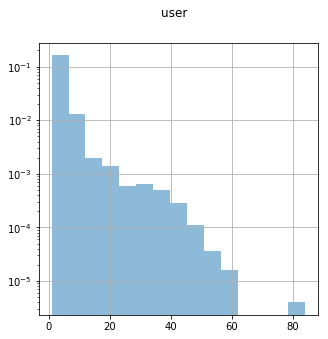

In [153]:
plt.figure()
df_17m['user'].hist(alpha=0.5, bins=15, figsize=(5, 5), normed = 1, log = True)
plt.suptitle('user')

In [125]:
df_1m_to_2m = mergeDF(df_1m, df_2m)

In [126]:
df_3m_to_4m = mergeDF(df_3m, df_4m)

In [3135]:
a = mergeDF(df_2m, df_3m_to_4m)

In [3139]:
c = mergeDF(a, df_5m_to_26w)

In [3140]:
d = mergeDF(c, df_27w_to_28w)

In [3141]:
e = mergeDF(d, df_29w_to_30w)

In [3142]:
e.shape

(127300, 14)

In [3401]:
f = mergeDF(df_3m_to_4m, df_5m_to_26w)

In [3402]:
g = mergeDF(f, df_27w_to_28w)

In [3403]:
h = mergeDF(g, df_8m)

In [3406]:
i = mergeDF(h, df_33w_to_34w)

In [3409]:
i.shape

(124578, 14)

In [127]:
df_5m_to_6m = mergeDF(df_5m, df_6m)

In [128]:
df_8m_to_9m = mergeDF(df_8m, df_9m)

In [129]:
df_10m_to_11m = mergeDF(df_10m, df_11m)

In [130]:
df_12m_to_13m = mergeDF(df_12m, df_13m)

In [131]:
df_14m_to_15m = mergeDF(df_14m, df_15m)

In [132]:
df_16m_to_17m = mergeDF(df_16m, df_17m)

In [133]:
df_1m_to_4m = mergeDF(df_1m_to_2m, df_3m_to_4m)

In [164]:
display(df_1m_to_4m.shape)

(69574, 14)

In [134]:
df_5m_to_26w = mergeDF(df_5m_to_6m, df_25w_to_26w)

In [135]:
df_27w_to_9m = mergeDF(df_27w_to_28w, df_8m_to_9m)

In [136]:
df_10m_to_13m = mergeDF(df_10m_to_11m, df_12m_to_13m)

In [137]:
df_14m_to_17m = mergeDF(df_14m_to_15m, df_16m_to_17m)

In [138]:
df_1sem2016 = mergeDF(df_1m_to_4m, df_5m_to_26w)

In [139]:
df_2sem2016 = mergeDF(df_27w_to_9m, df_10m_to_13m)

In [171]:
df_1sem2017 = mergeDF(df_14m_to_17m, df_69w)

In [315]:
display(df_1sem2016.shape)

(122427, 14)

In [316]:
display(df_2sem2016.shape)

(104926, 14)

In [174]:
display(df_1sem2017.shape)

(98141, 14)

In [317]:
display(df_all.shape)

(499938, 6)

In [32]:
df_all['creation'] = pd.to_datetime(df_all.creation)

/home/ivukotic/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [33]:
df_all.sort_values(by='creation')

,scope,name,creation,type,dsid,ptag
25108,mc15_13TeV,mc15_13TeV.410145.PowhegHerwigppEvtGen_UEEE5_W...,2016-01-01,DAOD_TOPQ1,410145,2501
402,mc15_13TeV,mc15_13TeV.410016.PowhegPythiaEvtGen_P2012_Wt_...,2016-01-01,DAOD_TOPQ1,410016,2501
11826,mc15_13TeV,mc15_13TeV.410016.PowhegPythiaEvtGen_P2012_Wt_...,2016-01-01,DAOD_TOPQ1,410016,2501
400,mc15_13TeV,mc15_13TeV.410015.PowhegPythiaEvtGen_P2012_Wt_...,2016-01-01,DAOD_TOPQ1,410015,2501
11912,mc15_13TeV,mc15_13TeV.410146.PowhegHerwigppEvtGen_UEEE5_W...,2016-01-02,DAOD_TOPQ1,410146,2501
16353,mc15_13TeV,mc15_13TeV.410015.PowhegPythiaEvtGen_P2012_Wt_...,2016-01-02,DAOD_TOPQ1,410015,2501
11910,mc15_13TeV,mc15_13TeV.410006.PowhegPythia8EvtGen_A14_ttba...,2016-01-04,DAOD_HIGG3D1,410006,2495
11909,mc15_13TeV,mc15_13TeV.361486.Sherpa_CT10_Ztautau_Mll10to4...,2016-01-04,DAOD_HIGG3D1,361486,2495
106507,mc15_13TeV,mc15_13TeV.361094.Sherpa_CT10_WqqZll_SHv21_imp...,2016-01-04,DAOD_HIGG5D1,361094,2459
11907,mc15_13TeV,mc15_13TeV.361513.MadGraphPythia8EvtGen_A14NNP...,2016-01-04,DAOD_HIGG3D1,361513,2495


In [34]:
df_all_ordered = df_all.sort_values(by='creation')

In [35]:
display(df_all_ordered.shape)

(499938, 6)

In [231]:
display(df_all_ordered.head(5))

,scope,name,creation,type,dsid,ptag
25108,mc15_13TeV,mc15_13TeV.410145.PowhegHerwigppEvtGen_UEEE5_W...,2016-01-01,DAOD_TOPQ1,410145,2501
402,mc15_13TeV,mc15_13TeV.410016.PowhegPythiaEvtGen_P2012_Wt_...,2016-01-01,DAOD_TOPQ1,410016,2501
11826,mc15_13TeV,mc15_13TeV.410016.PowhegPythiaEvtGen_P2012_Wt_...,2016-01-01,DAOD_TOPQ1,410016,2501
400,mc15_13TeV,mc15_13TeV.410015.PowhegPythiaEvtGen_P2012_Wt_...,2016-01-01,DAOD_TOPQ1,410015,2501
11912,mc15_13TeV,mc15_13TeV.410146.PowhegHerwigppEvtGen_UEEE5_W...,2016-01-02,DAOD_TOPQ1,410146,2501


In [320]:
df_year2016 = mergeDF(df_1sem2016, df_2sem2016)

In [321]:
df_year2016.shape

(188997, 14)

In [322]:
df_total = mergeDF(df_year2016, df_1sem2017)

In [323]:
df_total.shape

(241288, 14)

In [324]:
store = pd.HDFStore('store_access>0.h5')

In [325]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store_access>0.h5
Empty

In [326]:
store['df_1sem2016'] = df_1sem2016

In [327]:
store['df_2sem2016'] = df_2sem2016

In [328]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store_access>0.h5
/df_1sem2016            frame        (shape->[122427,14])
/df_2sem2016            frame        (shape->[104926,14])

In [329]:
store['df_1sem2017'] = df_1sem2017

In [330]:
store['df_year2016'] = df_year2016

In [331]:
store['df_total'] = df_total

In [332]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store_access>0.h5
/df_1sem2016            frame        (shape->[122427,14])
/df_1sem2017            frame        (shape->[98141,14]) 
/df_2sem2016            frame        (shape->[104926,14])
/df_total               frame        (shape->[241288,14])
/df_year2016            frame        (shape->[188997,14])

In [333]:
store.close()

In [334]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store_access>0.h5
File is CLOSED

In [335]:
store.open()

In [336]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store_access>0.h5
/df_1sem2016            frame        (shape->[122427,14])
/df_1sem2017            frame        (shape->[98141,14]) 
/df_2sem2016            frame        (shape->[104926,14])
/df_total               frame        (shape->[241288,14])
/df_year2016            frame        (shape->[188997,14])

In [337]:
store.close()

In [338]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store_access>0.h5
File is CLOSED

In [339]:
df_conferma= pd.read_hdf('../Matteo/store_access>0.h5', key='df_1sem2016')

In [340]:
df_conferma.shape

(122427, 14)

In [341]:
df_conferma2= pd.read_hdf('../Matteo/store_access>0.h5', key='df_total')

In [342]:
df_conferma2.shape

(241288, 14)

In [343]:
df_all_ordered

,scope,name,creation,type,dsid,ptag
25108,mc15_13TeV,mc15_13TeV.410145.PowhegHerwigppEvtGen_UEEE5_W...,2016-01-01,DAOD_TOPQ1,410145,2501
402,mc15_13TeV,mc15_13TeV.410016.PowhegPythiaEvtGen_P2012_Wt_...,2016-01-01,DAOD_TOPQ1,410016,2501
11826,mc15_13TeV,mc15_13TeV.410016.PowhegPythiaEvtGen_P2012_Wt_...,2016-01-01,DAOD_TOPQ1,410016,2501
400,mc15_13TeV,mc15_13TeV.410015.PowhegPythiaEvtGen_P2012_Wt_...,2016-01-01,DAOD_TOPQ1,410015,2501
11912,mc15_13TeV,mc15_13TeV.410146.PowhegHerwigppEvtGen_UEEE5_W...,2016-01-02,DAOD_TOPQ1,410146,2501
16353,mc15_13TeV,mc15_13TeV.410015.PowhegPythiaEvtGen_P2012_Wt_...,2016-01-02,DAOD_TOPQ1,410015,2501
11910,mc15_13TeV,mc15_13TeV.410006.PowhegPythia8EvtGen_A14_ttba...,2016-01-04,DAOD_HIGG3D1,410006,2495
11909,mc15_13TeV,mc15_13TeV.361486.Sherpa_CT10_Ztautau_Mll10to4...,2016-01-04,DAOD_HIGG3D1,361486,2495
106507,mc15_13TeV,mc15_13TeV.361094.Sherpa_CT10_WqqZll_SHv21_imp...,2016-01-04,DAOD_HIGG5D1,361094,2459
11907,mc15_13TeV,mc15_13TeV.361513.MadGraphPythia8EvtGen_A14NNP...,2016-01-04,DAOD_HIGG3D1,361513,2495


In [344]:
df_all_ordered[(df_all_ordered['creation'] >= '2016-01-01') & (df_all_ordered['creation'] <= '2016-01-07')]

,scope,name,creation,type,dsid,ptag
25108,mc15_13TeV,mc15_13TeV.410145.PowhegHerwigppEvtGen_UEEE5_W...,2016-01-01,DAOD_TOPQ1,410145,2501
402,mc15_13TeV,mc15_13TeV.410016.PowhegPythiaEvtGen_P2012_Wt_...,2016-01-01,DAOD_TOPQ1,410016,2501
11826,mc15_13TeV,mc15_13TeV.410016.PowhegPythiaEvtGen_P2012_Wt_...,2016-01-01,DAOD_TOPQ1,410016,2501
400,mc15_13TeV,mc15_13TeV.410015.PowhegPythiaEvtGen_P2012_Wt_...,2016-01-01,DAOD_TOPQ1,410015,2501
11912,mc15_13TeV,mc15_13TeV.410146.PowhegHerwigppEvtGen_UEEE5_W...,2016-01-02,DAOD_TOPQ1,410146,2501
16353,mc15_13TeV,mc15_13TeV.410015.PowhegPythiaEvtGen_P2012_Wt_...,2016-01-02,DAOD_TOPQ1,410015,2501
11910,mc15_13TeV,mc15_13TeV.410006.PowhegPythia8EvtGen_A14_ttba...,2016-01-04,DAOD_HIGG3D1,410006,2495
11909,mc15_13TeV,mc15_13TeV.361486.Sherpa_CT10_Ztautau_Mll10to4...,2016-01-04,DAOD_HIGG3D1,361486,2495
106507,mc15_13TeV,mc15_13TeV.361094.Sherpa_CT10_WqqZll_SHv21_imp...,2016-01-04,DAOD_HIGG5D1,361094,2459
11907,mc15_13TeV,mc15_13TeV.361513.MadGraphPythia8EvtGen_A14NNP...,2016-01-04,DAOD_HIGG3D1,361513,2495


In [345]:
df_all_1w = df_all_ordered[(df_all_ordered['creation'] >= '2016-01-01') & (df_all_ordered['creation'] <= '2016-01-07')]

In [346]:
df_all_1w.shape

(3081, 6)

In [347]:
df_all_2w = df_all_ordered[(df_all_ordered['creation'] >= '2016-01-08') & (df_all_ordered['creation'] <= '2016-01-14')]

In [348]:
df_all_2w.shape

(2714, 6)

In [349]:
df_all_3w = df_all_ordered[(df_all_ordered['creation'] >= '2016-01-15') & (df_all_ordered['creation'] <= '2016-01-21')]

In [350]:
df_all_3w.shape

(5427, 6)

In [351]:
df_all_4w = df_all_ordered[(df_all_ordered['creation'] >= '2016-01-22') & (df_all_ordered['creation'] <= '2016-01-28')]

In [352]:
df_all_5w = df_all_ordered[(df_all_ordered['creation'] >= '2016-01-29') & (df_all_ordered['creation'] <= '2016-02-04')]

In [353]:
df_all_2w.shape

(2714, 6)

In [354]:
df_all_5w.shape

(5102, 6)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe925d97198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe9255154a8>]], dtype=object)

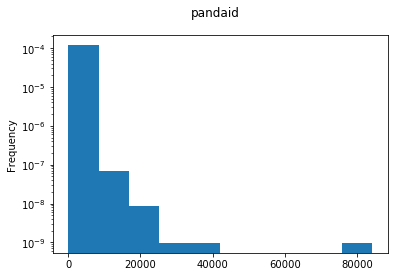

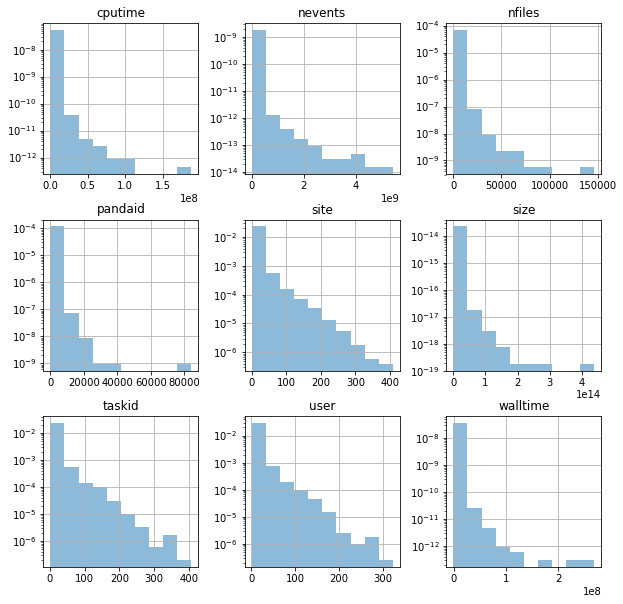

In [355]:
plt.figure();
df_1sem2016.pandaid.plot.hist(bins=10, normed = True)
plt.yscale('log')
plt.suptitle('pandaid')

plt.figure()
df_1sem2016[['user', 'taskid', 'cputime', 'pandaid', 'size', 
    'nfiles', 'site', 'walltime', 'nevents']].hist(alpha=0.5, bins=10, figsize=(10, 10), log = True, normed = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe936fda198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe92d0aa1d0>]], dtype=object)

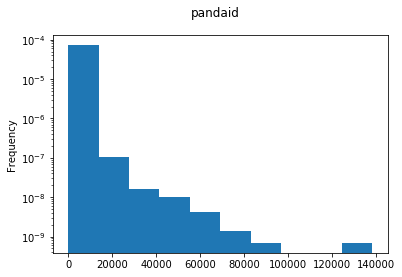

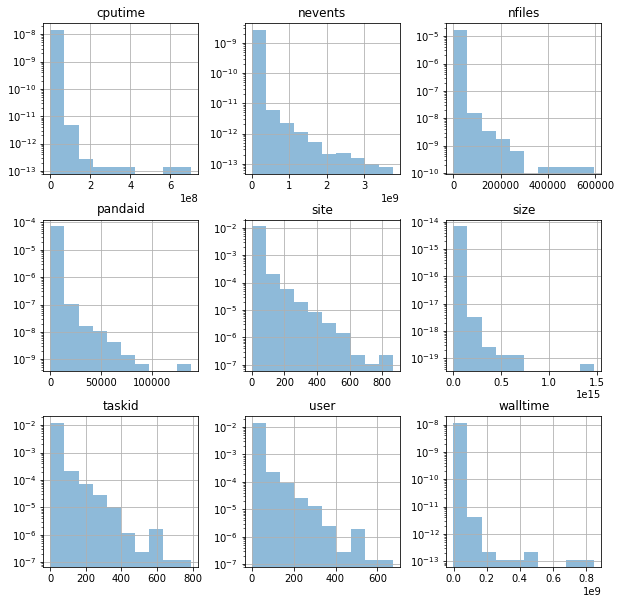

In [356]:
plt.figure();
df_2sem2016.pandaid.plot.hist(bins=10, normed = True)
plt.yscale('log')
plt.suptitle('pandaid')

plt.figure()
df_2sem2016[['user', 'taskid', 'cputime', 'pandaid', 'size', 
    'nfiles', 'site', 'walltime', 'nevents']].hist(alpha=0.5, bins=10, figsize=(10, 10), log = True, normed = True)

In [10]:
plt.figure();
df_1sem2017.pandaid.plot.hist(bins=10, normed = True)
plt.yscale('log')
plt.suptitle('pandaid')

plt.figure()
df_1sem2017[['user', 'taskid', 'cputime', 'pandaid', 'size', 
    'nfiles', 'site', 'walltime', 'nevents']].hist(alpha=0.5, bins=10, figsize=(10, 10), log = True, normed = True)

NameError: name 'df_1sem2017' is not defined

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe928a70908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe92cae4b38>]], dtype=object)

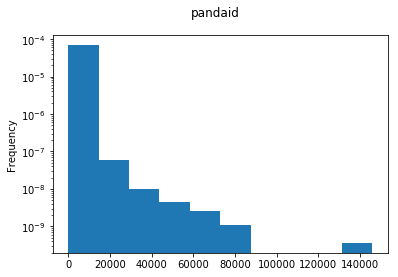

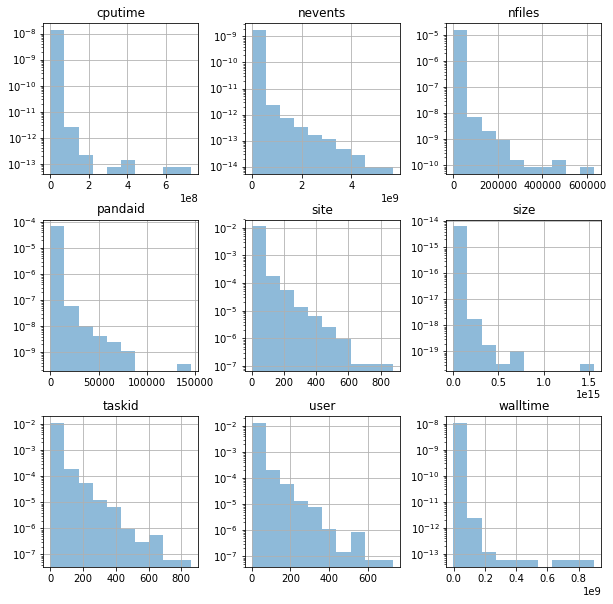

In [358]:
plt.figure();
df_year2016.pandaid.plot.hist(bins=10, normed = True)
plt.yscale('log')
plt.suptitle('pandaid')

plt.figure()
df_year2016[['user', 'taskid', 'cputime', 'pandaid', 'size', 
    'nfiles', 'site', 'walltime', 'nevents']].hist(alpha=0.5, bins=10, figsize=(10, 10), log = True, normed = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe92808dba8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe928cb6860>]], dtype=object)

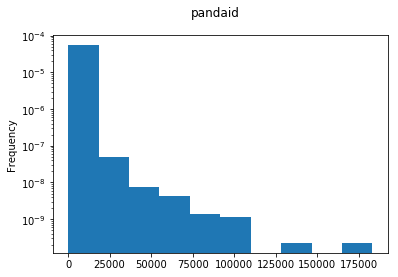

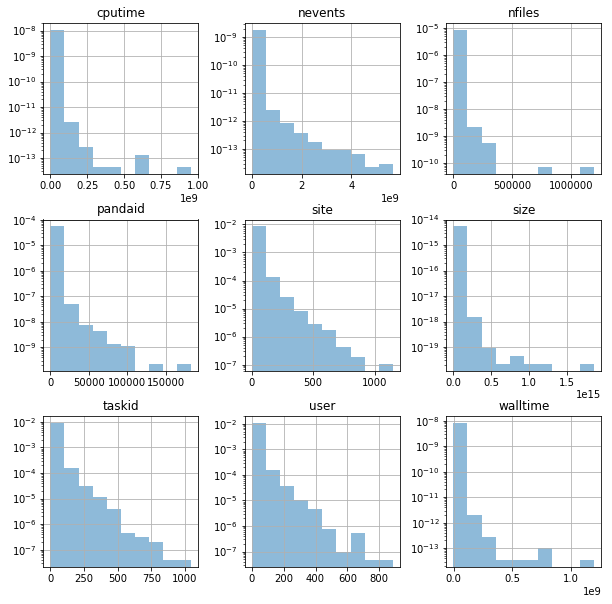

In [359]:
plt.figure();
df_total.pandaid.plot.hist(bins=10, normed = True)
plt.yscale('log')
plt.suptitle('pandaid')

plt.figure()
df_total[['user', 'taskid', 'cputime', 'pandaid', 'size', 
    'nfiles', 'site', 'walltime', 'nevents']].hist(alpha=0.5, bins=10, figsize=(10, 10), log = True, normed = True)

In [361]:
df_1m_to_3m = mergeDF(df_1m_to_2m, df_3m)

In [362]:
df_1trim2016 = mergeDF(df_1m_to_3m, df_13w)

In [363]:
df_14w_to_16w = mergeDF(df_14w, df_15w_to_16w)

In [364]:
df_2trim2016 = mergeDF(df_14w_to_16w, df_5m_to_26w)

In [365]:
df_37w_to_39w = mergeDF(df_37w_to_38w, df_39w)

In [366]:
df_3trim2016 = mergeDF(df_27w_to_9m, df_37w_to_39w)

In [367]:
df_40w_to_44w = mergeDF(df_40w, df_11m)

In [368]:
df_4trim2016 = mergeDF(df_40w_to_44w, df_12m_to_13m)

In [373]:
df_16m_to_65w = mergeDF(df_16m, df_65w)

In [374]:
df_1trim2017 = mergeDF(df_14m_to_15m, df_16m_to_65w)

In [378]:
store.open()

In [379]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store_access>0.h5
/df_1sem2016            frame        (shape->[122427,14])
/df_1sem2017            frame        (shape->[98141,14]) 
/df_2sem2016            frame        (shape->[104926,14])
/df_total               frame        (shape->[241288,14])
/df_year2016            frame        (shape->[188997,14])

In [380]:
store['df_1trim2016'] = df_1trim2016

In [381]:
store['df_2trim2016'] = df_2trim2016

In [382]:
store['df_3trim2016'] = df_3trim2016

In [383]:
store['df_4trim2016'] = df_4trim2016

In [384]:
store['df_1trim2017'] = df_1trim2017

In [385]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store_access>0.h5
/df_1sem2016             frame        (shape->[122427,14])
/df_1sem2017             frame        (shape->[98141,14]) 
/df_1trim2016            frame        (shape->[64675,14]) 
/df_1trim2017            frame        (shape->[90685,14]) 
/df_2sem2016             frame        (shape->[104926,14])
/df_2trim2016            frame        (shape->[93621,14]) 
/df_3trim2016            frame        (shape->[64054,14]) 
/df_4trim2016            frame        (shape->[78750,14]) 
/df_total                frame        (shape->[241288,14])
/df_year2016             frame        (shape->[188997,14])

In [386]:
store.close()

In [387]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store_access>0.h5
File is CLOSED

In [393]:
store.open()

In [394]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store_access>0.h5
/df_1sem2016             frame        (shape->[122427,14])
/df_1sem2017             frame        (shape->[98141,14]) 
/df_1trim2016            frame        (shape->[64675,14]) 
/df_1trim2017            frame        (shape->[90685,14]) 
/df_2sem2016             frame        (shape->[104926,14])
/df_2trim2016            frame        (shape->[93621,14]) 
/df_3trim2016            frame        (shape->[64054,14]) 
/df_4trim2016            frame        (shape->[78750,14]) 
/df_total                frame        (shape->[241288,14])
/df_year2016             frame        (shape->[188997,14])

In [396]:
del store['df_1sem2017']

In [397]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store_access>0.h5
/df_1sem2016             frame        (shape->[122427,14])
/df_1trim2016            frame        (shape->[64675,14]) 
/df_1trim2017            frame        (shape->[90685,14]) 
/df_2sem2016             frame        (shape->[104926,14])
/df_2trim2016            frame        (shape->[93621,14]) 
/df_3trim2016            frame        (shape->[64054,14]) 
/df_4trim2016            frame        (shape->[78750,14]) 
/df_total                frame        (shape->[241288,14])
/df_year2016             frame        (shape->[188997,14])

In [398]:
del store['df_total']

In [399]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store_access>0.h5
/df_1sem2016             frame        (shape->[122427,14])
/df_1trim2016            frame        (shape->[64675,14]) 
/df_1trim2017            frame        (shape->[90685,14]) 
/df_2sem2016             frame        (shape->[104926,14])
/df_2trim2016            frame        (shape->[93621,14]) 
/df_3trim2016            frame        (shape->[64054,14]) 
/df_4trim2016            frame        (shape->[78750,14]) 
/df_year2016             frame        (shape->[188997,14])

In [140]:
df_70w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-04-28_meas_7_pred_7.h5', 'X')

In [141]:
df_71w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-05-05_meas_7_pred_7.h5', 'X')

In [142]:
df_72w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-05-12_meas_7_pred_7.h5', 'X')

In [143]:
df_73w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-05-19_meas_7_pred_7.h5', 'X')

In [144]:
df_74w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-05-26_meas_7_pred_7.h5', 'X')

In [145]:
df_75w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-06-02_meas_7_pred_7.h5', 'X')

In [146]:
df_76w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-06-09_meas_7_pred_7.h5', 'X')

In [147]:
df_77w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-06-16_meas_7_pred_7.h5', 'X')

In [148]:
df_78w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-06-23_meas_7_pred_7.h5', 'X')

In [149]:
df_69w_to_70w = mergeDF(df_69w, df_70w)

In [150]:
df_71w_to_72w = mergeDF(df_71w, df_72w)

In [151]:
df_73w_to_74w = mergeDF(df_73w, df_74w)

In [152]:
df_75w_to_76w = mergeDF(df_75w, df_76w)

In [153]:
df_77w_to_78w = mergeDF(df_77w, df_78w)

In [154]:
df_18m = mergeDF(df_69w_to_70w, df_71w_to_72w)

In [155]:
df_19m = mergeDF(df_73w_to_74w, df_75w_to_76w)

In [156]:
df_18m_to_19m = mergeDF(df_18m, df_19m)

In [157]:
df_18m_to_78w = mergeDF(df_18m_to_19m, df_77w_to_78w)

In [158]:
df_1sem2017 = mergeDF(df_14m_to_17m, df_18m_to_78w)

In [159]:
df_1sem2017.shape

(114745, 14)

In [421]:
store['df_1sem2017'] = df_1sem2017

In [422]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store_access>0.h5
/df_1sem2016             frame        (shape->[122427,14])
/df_1sem2017             frame        (shape->[114745,14])
/df_1trim2016            frame        (shape->[64675,14]) 
/df_1trim2017            frame        (shape->[90685,14]) 
/df_2sem2016             frame        (shape->[104926,14])
/df_2trim2016            frame        (shape->[93621,14]) 
/df_3trim2016            frame        (shape->[64054,14]) 
/df_4trim2016            frame        (shape->[78750,14]) 
/df_year2016             frame        (shape->[188997,14])

In [423]:
df_total = mergeDF(df_year2016, df_1sem2017)

In [424]:
df_66w_to_68w = mergeDF(df_66w, df_67w_to_68w)

In [425]:
df_total.shape

(256123, 14)

In [426]:
store['df_total'] = df_total

In [436]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store_withBackground.h5
Empty

In [428]:
df_2trim2017 = mergeDF(df_66w_to_68w, df_18m_to_78w)

In [442]:
store['df_2trim2017'] = df_2trim2017

In [7]:
df_conferma= pd.read_hdf('../Matteo/store_access>0.h5', key='df_1sem2016')

In [8]:
display(df_conferma)

,name,scope,dsid,ptag,type,cputime,size,taskid,user,walltime,site,pandaid,nevents,nfiles
0,data11_7TeV.00178044.physics_Muons.merge.DAOD_...,data11_7TeV,178044,811,DAOD_ONIAMUMU,32586,209093135328,8,8,60435,8,51,1771256,56
1,data11_7TeV.00178047.physics_Muons.merge.DAOD_...,data11_7TeV,178047,811,DAOD_ONIAMUMU,1401,5942572424,8,8,3720,8,8,45912,8
2,data11_7TeV.00178109.physics_Muons.merge.DAOD_...,data11_7TeV,178109,811,DAOD_ONIAMUMU,91322,373981640121,10,10,182843,10,84,3320622,99
3,data11_7TeV.00179710.physics_Muons.merge.DAOD_...,data11_7TeV,179710,811,DAOD_ONIAMUMU,52033,337254720728,9,9,88649,9,80,2599976,88
4,data11_7TeV.00179725.physics_Muons.merge.DAOD_...,data11_7TeV,179725,811,DAOD_ONIAMUMU,21981,137957583000,8,8,35439,9,32,1015208,40
5,data11_7TeV.00179739.physics_Muons.merge.DAOD_...,data11_7TeV,179739,811,DAOD_ONIAMUMU,34740,178359348304,9,9,80375,9,39,1347904,48
6,data11_7TeV.00179771.physics_Muons.merge.DAOD_...,data11_7TeV,179771,811,DAOD_ONIAMUMU,13699,78201822544,8,8,31602,8,20,574752,24
7,data11_7TeV.00179804.physics_Muons.merge.DAOD_...,data11_7TeV,179804,811,DAOD_ONIAMUMU,137603,521213725818,9,9,284477,10,126,3945213,153
8,data11_7TeV.00179938.physics_Muons.merge.DAOD_...,data11_7TeV,179938,811,DAOD_ONIAMUMU,11512,70806080520,8,8,17183,8,20,536384,24
9,data11_7TeV.00179939.physics_Muons.merge.DAOD_...,data11_7TeV,179939,811,DAOD_ONIAMUMU,36737,236699075976,8,8,80245,8,52,1808544,64


In [30]:
store = pd.HDFStore('store_withBackground.h5')

In [36]:
store['df_all_ordered'] = df_all_ordered

In [37]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store_withBackground.h5
/df_all_ordered            frame        (shape->[1,6])

In [38]:
df_all_ordered.shape

(499938, 6)

In [39]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store_withBackground.h5
/df_all_ordered            frame        (shape->[1,6])

In [40]:
del store['df_all_ordered']

In [41]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store_withBackground.h5
Empty

In [42]:
store['df_all_ordered'] = df_all_ordered

In [43]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store_withBackground.h5
/df_all_ordered            frame        (shape->[1,6])

In [44]:
df_speriamo = pd.read_hdf('../Matteo/store_access>0.h5', key='df_year2016')

In [45]:
display(df_speriamo)

,name,scope,dsid,ptag,type,cputime,size,taskid,user,walltime,site,pandaid,nevents,nfiles
0,data11_7TeV.00178044.physics_Muons.merge.DAOD_...,data11_7TeV,178044,811,DAOD_ONIAMUMU,38875,235229777244,9,9,68472,9,58,1992663,63
1,data11_7TeV.00178047.physics_Muons.merge.DAOD_...,data11_7TeV,178047,811,DAOD_ONIAMUMU,1673,6685393977,9,9,4157,9,9,51651,9
2,data11_7TeV.00178109.physics_Muons.merge.DAOD_...,data11_7TeV,178109,811,DAOD_ONIAMUMU,106670,415535155690,11,11,202671,11,95,3689580,110
3,data11_7TeV.00179710.physics_Muons.merge.DAOD_...,data11_7TeV,179710,811,DAOD_ONIAMUMU,63163,379411560819,10,10,105518,10,91,2924973,99
4,data11_7TeV.00179725.physics_Muons.merge.DAOD_...,data11_7TeV,179725,811,DAOD_ONIAMUMU,26994,155202280875,9,9,42970,10,37,1142109,45
5,data11_7TeV.00179739.physics_Muons.merge.DAOD_...,data11_7TeV,179739,811,DAOD_ONIAMUMU,43468,200654266842,10,10,91908,10,45,1516392,54
6,data11_7TeV.00179771.physics_Muons.merge.DAOD_...,data11_7TeV,179771,811,DAOD_ONIAMUMU,16847,87977050362,9,9,37322,9,23,646596,27
7,data11_7TeV.00179804.physics_Muons.merge.DAOD_...,data11_7TeV,179804,811,DAOD_ONIAMUMU,160846,579126362020,10,10,314439,11,143,4383570,170
8,data11_7TeV.00179938.physics_Muons.merge.DAOD_...,data11_7TeV,179938,811,DAOD_ONIAMUMU,14406,79656840585,9,9,22510,9,23,603432,27
9,data11_7TeV.00179939.physics_Muons.merge.DAOD_...,data11_7TeV,179939,811,DAOD_ONIAMUMU,45357,266286460473,9,9,94847,9,60,2034612,72


In [46]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store_withBackground.h5
/df_all_ordered            frame        (shape->[1,6])

In [161]:
df_1sem2016 = pd.read_hdf('../Matteo/store_access>0.h5', key='df_1sem2016')

In [162]:
df_1sem2016.shape

(122427, 14)

In [163]:
df_1sem2016

,name,scope,dsid,ptag,type,cputime,size,taskid,user,walltime,site,pandaid,nevents,nfiles
0,data11_7TeV.00178044.physics_Muons.merge.DAOD_...,data11_7TeV,178044,811,DAOD_ONIAMUMU,32586,209093135328,8,8,60435,8,51,1771256,56
1,data11_7TeV.00178047.physics_Muons.merge.DAOD_...,data11_7TeV,178047,811,DAOD_ONIAMUMU,1401,5942572424,8,8,3720,8,8,45912,8
2,data11_7TeV.00178109.physics_Muons.merge.DAOD_...,data11_7TeV,178109,811,DAOD_ONIAMUMU,91322,373981640121,10,10,182843,10,84,3320622,99
3,data11_7TeV.00179710.physics_Muons.merge.DAOD_...,data11_7TeV,179710,811,DAOD_ONIAMUMU,52033,337254720728,9,9,88649,9,80,2599976,88
4,data11_7TeV.00179725.physics_Muons.merge.DAOD_...,data11_7TeV,179725,811,DAOD_ONIAMUMU,21981,137957583000,8,8,35439,9,32,1015208,40
5,data11_7TeV.00179739.physics_Muons.merge.DAOD_...,data11_7TeV,179739,811,DAOD_ONIAMUMU,34740,178359348304,9,9,80375,9,39,1347904,48
6,data11_7TeV.00179771.physics_Muons.merge.DAOD_...,data11_7TeV,179771,811,DAOD_ONIAMUMU,13699,78201822544,8,8,31602,8,20,574752,24
7,data11_7TeV.00179804.physics_Muons.merge.DAOD_...,data11_7TeV,179804,811,DAOD_ONIAMUMU,137603,521213725818,9,9,284477,10,126,3945213,153
8,data11_7TeV.00179938.physics_Muons.merge.DAOD_...,data11_7TeV,179938,811,DAOD_ONIAMUMU,11512,70806080520,8,8,17183,8,20,536384,24
9,data11_7TeV.00179939.physics_Muons.merge.DAOD_...,data11_7TeV,179939,811,DAOD_ONIAMUMU,36737,236699075976,8,8,80245,8,52,1808544,64


In [147]:
df_2sem2016 = pd.read_hdf('../Matteo/store_access>0.h5', key='df_2sem2016')

In [148]:
df_1sem2017 = pd.read_hdf('../Matteo/store_access>0.h5', key='df_1sem2017')

In [149]:
df_year2016 = pd.read_hdf('../Matteo/store_access>0.h5', key='df_year2016')

In [150]:
df_total = pd.read_hdf('../Matteo/store_access>0.h5', key='df_total')

In [151]:
df_1trim2016 = pd.read_hdf('../Matteo/store_access>0.h5', key='df_1trim2016')

In [152]:
df_2trim2016 = pd.read_hdf('../Matteo/store_access>0.h5', key='df_2trim2016')

In [153]:
df_3trim2016 = pd.read_hdf('../Matteo/store_access>0.h5', key='df_3trim2016')

In [154]:
df_4trim2016 = pd.read_hdf('../Matteo/store_access>0.h5', key='df_4trim2016')

In [155]:
df_1trim2017 = pd.read_hdf('../Matteo/store_access>0.h5', key='df_1trim2017')

In [156]:
df_2trim2017 = pd.read_hdf('../Matteo/store_access>0.h5', key='df_2trim2017')

In [852]:
df_total.shape

(256123, 14)

In [63]:
df_1sem2016.user

0          8
1          8
2         10
3          9
4          8
5          9
6          8
7          9
8          8
9          8
10         7
11         8
12         8
13         8
14         9
15         9
16        10
17        10
18         9
19        11
20        10
21        10
22        12
23         9
24        10
25        12
26         9
27        11
28         8
29         9
          ..
122397     1
122398     4
122399     2
122400     1
122401     4
122402     2
122403     2
122404     1
122405     1
122406     1
122407     1
122408     4
122409     4
122410     4
122411     4
122412     4
122413     4
122414     5
122415     5
122416     5
122417     6
122418     3
122419     2
122420     3
122421     2
122422     3
122423     3
122424     3
122425     2
122426     2
Name: user, Length: 122427, dtype: int64

In [75]:
column_1sem2016 = pd.DataFrame({'period': '1sem2016'}, index=list(range(122427)))

In [853]:
df_1sem2016['period'] = pd.Series('1sem2016', index=df_1sem2016.index)

In [854]:
df_1sem2016

,name,scope,dsid,ptag,type,cputime,size,taskid,user,walltime,site,pandaid,nevents,nfiles,period
0,data11_7TeV.00178044.physics_Muons.merge.DAOD_...,data11_7TeV,178044,811,DAOD_ONIAMUMU,32586,209093135328,8,8,60435,8,51,1771256,56,1sem2016
1,data11_7TeV.00178047.physics_Muons.merge.DAOD_...,data11_7TeV,178047,811,DAOD_ONIAMUMU,1401,5942572424,8,8,3720,8,8,45912,8,1sem2016
2,data11_7TeV.00178109.physics_Muons.merge.DAOD_...,data11_7TeV,178109,811,DAOD_ONIAMUMU,91322,373981640121,10,10,182843,10,84,3320622,99,1sem2016
3,data11_7TeV.00179710.physics_Muons.merge.DAOD_...,data11_7TeV,179710,811,DAOD_ONIAMUMU,52033,337254720728,9,9,88649,9,80,2599976,88,1sem2016
4,data11_7TeV.00179725.physics_Muons.merge.DAOD_...,data11_7TeV,179725,811,DAOD_ONIAMUMU,21981,137957583000,8,8,35439,9,32,1015208,40,1sem2016
5,data11_7TeV.00179739.physics_Muons.merge.DAOD_...,data11_7TeV,179739,811,DAOD_ONIAMUMU,34740,178359348304,9,9,80375,9,39,1347904,48,1sem2016
6,data11_7TeV.00179771.physics_Muons.merge.DAOD_...,data11_7TeV,179771,811,DAOD_ONIAMUMU,13699,78201822544,8,8,31602,8,20,574752,24,1sem2016
7,data11_7TeV.00179804.physics_Muons.merge.DAOD_...,data11_7TeV,179804,811,DAOD_ONIAMUMU,137603,521213725818,9,9,284477,10,126,3945213,153,1sem2016
8,data11_7TeV.00179938.physics_Muons.merge.DAOD_...,data11_7TeV,179938,811,DAOD_ONIAMUMU,11512,70806080520,8,8,17183,8,20,536384,24,1sem2016
9,data11_7TeV.00179939.physics_Muons.merge.DAOD_...,data11_7TeV,179939,811,DAOD_ONIAMUMU,36737,236699075976,8,8,80245,8,52,1808544,64,1sem2016


In [855]:
df_2sem2016['period'] = pd.Series('2sem2016', index=df_2sem2016.index)

In [856]:
df_1sem2017['period'] = pd.Series('1sem2017', index=df_1sem2017.index)

In [857]:
df_sem = pd.concat([df_1sem2016, df_2sem2016, df_1sem2017], ignore_index=True)

In [858]:
df_sem

,name,scope,dsid,ptag,type,cputime,size,taskid,user,walltime,site,pandaid,nevents,nfiles,period
0,data11_7TeV.00178044.physics_Muons.merge.DAOD_...,data11_7TeV,178044,811,DAOD_ONIAMUMU,32586,209093135328,8,8,60435,8,51,1771256,56,1sem2016
1,data11_7TeV.00178047.physics_Muons.merge.DAOD_...,data11_7TeV,178047,811,DAOD_ONIAMUMU,1401,5942572424,8,8,3720,8,8,45912,8,1sem2016
2,data11_7TeV.00178109.physics_Muons.merge.DAOD_...,data11_7TeV,178109,811,DAOD_ONIAMUMU,91322,373981640121,10,10,182843,10,84,3320622,99,1sem2016
3,data11_7TeV.00179710.physics_Muons.merge.DAOD_...,data11_7TeV,179710,811,DAOD_ONIAMUMU,52033,337254720728,9,9,88649,9,80,2599976,88,1sem2016
4,data11_7TeV.00179725.physics_Muons.merge.DAOD_...,data11_7TeV,179725,811,DAOD_ONIAMUMU,21981,137957583000,8,8,35439,9,32,1015208,40,1sem2016
5,data11_7TeV.00179739.physics_Muons.merge.DAOD_...,data11_7TeV,179739,811,DAOD_ONIAMUMU,34740,178359348304,9,9,80375,9,39,1347904,48,1sem2016
6,data11_7TeV.00179771.physics_Muons.merge.DAOD_...,data11_7TeV,179771,811,DAOD_ONIAMUMU,13699,78201822544,8,8,31602,8,20,574752,24,1sem2016
7,data11_7TeV.00179804.physics_Muons.merge.DAOD_...,data11_7TeV,179804,811,DAOD_ONIAMUMU,137603,521213725818,9,9,284477,10,126,3945213,153,1sem2016
8,data11_7TeV.00179938.physics_Muons.merge.DAOD_...,data11_7TeV,179938,811,DAOD_ONIAMUMU,11512,70806080520,8,8,17183,8,20,536384,24,1sem2016
9,data11_7TeV.00179939.physics_Muons.merge.DAOD_...,data11_7TeV,179939,811,DAOD_ONIAMUMU,36737,236699075976,8,8,80245,8,52,1808544,64,1sem2016


In [879]:
def correlations(data, title = '', **kwds):
    """Calculate pairwise correlation between features.
    Extra arguments are passed on to DataFrame.corr()
    """
    # simply call df.corr() to get a table of correlation values if you do not need the fancy plotting
    corrmat = data.corr(**kwds)

    fig, ax1 = plt.subplots(ncols=1, figsize=(6,5))

    opts = {'cmap': plt.get_cmap("RdBu"),
            'vmin': -1, 'vmax': +1}
    heatmap1 = ax1.pcolor(corrmat, **opts)
    plt.colorbar(heatmap1, ax=ax1)

    ax1.set_title("Correlation "+title)

    labels = corrmat.columns.values
    for ax in (ax1,):
        # shift location of ticks to center of the bins
        ax.set_xticks(np.arange(len(labels))+0.5, minor=False)
        ax.set_yticks(np.arange(len(labels))+0.5, minor=False)
        ax.set_xticklabels(labels, minor=False, ha='right', rotation=70)
        ax.set_yticklabels(labels, minor=False)

    plt.tight_layout()
    
    
    
    
    
    #DEVI DROPPARE LE STRINGHE  (ANCHE dsid E ptag)  !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [837]:
df_sem_corr = df_sem.drop([col for col in df_sem.columns if 'dsid' in col], axis=1)
df_sem_corr = df_sem_corr.drop([col for col in df_sem_corr.columns if 'ptag' in col], axis=1)
df_sem_corr = df_sem_corr.drop([col for col in df_sem_corr.columns if 'type' in col], axis=1)
df_sem_corr = df_sem_corr.drop([col for col in df_sem_corr.columns if 'scope' in col], axis=1)
df_sem_corr = df_sem_corr.drop([col for col in df_sem_corr.columns if 'name' in col], axis=1)

In [866]:
store[store_access>0.h5]

SyntaxError: invalid syntax (<ipython-input-866-47bf0dbab6fc>, line 1)

In [870]:
store.keys()

['/df_all_ordered']

In [871]:
store['df_sem'] = df_sem

In [872]:
store.keys()

['/df_all_ordered', '/df_sem']

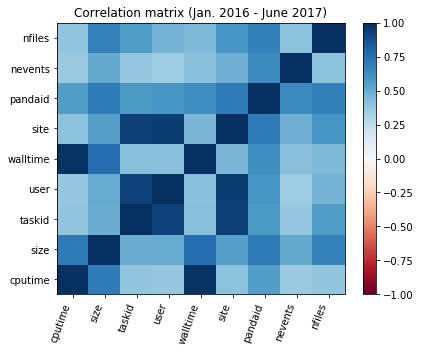

In [884]:
correlations(df_sem_corr, 'matrix (Jan. 2016 - June 2017)')

In [883]:
df_sem_corr.corr()

,cputime,size,taskid,user,walltime,site,pandaid,nevents,nfiles
cputime,1.000000,0.706617,0.397339,0.385950,0.990353,0.413427,0.557929,0.371515,0.392140
size,0.706617,1.000000,0.499065,0.504481,0.758609,0.550845,0.705277,0.514250,0.677370
taskid,0.397339,0.499065,1.000000,0.935983,0.427067,0.940481,0.573743,0.389282,0.554760
user,0.385950,0.504481,0.935983,1.000000,0.419328,0.951161,0.586376,0.365754,0.474704
walltime,0.990353,0.758609,0.427067,0.419328,1.000000,0.455140,0.618560,0.414104,0.440113
site,0.413427,0.550845,0.940481,0.951161,0.455140,1.000000,0.709786,0.487592,0.590612
pandaid,0.557929,0.705277,0.573743,0.586376,0.618560,0.709786,1.000000,0.633685,0.686084
nevents,0.371515,0.514250,0.389282,0.365754,0.414104,0.487592,0.633685,1.000000,0.408861
nfiles,0.392140,0.677370,0.554760,0.474704,0.440113,0.590612,0.686084,0.408861,1.000000


In [886]:
df_total= pd.read_hdf('../Matteo/store_access>0.h5', key='df_total')

In [887]:
df_total.shape

(256123, 14)

In [888]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store_withBackground.h5
/df_all_ordered            frame        (shape->[1,6])      
/df_sem                    frame        (shape->[342098,15])

In [901]:
df_1sem2016_corr = df_1sem2016.drop([col for col in df_1sem2016.columns if 'dsid' in col], axis=1)
df_1sem2016_corr = df_1sem2016_corr.drop([col for col in df_1sem2016_corr.columns if 'ptag' in col], axis=1)
df_1sem2016_corr = df_1sem2016_corr.drop([col for col in df_1sem2016_corr.columns if 'type' in col], axis=1)
df_1sem2016_corr = df_1sem2016_corr.drop([col for col in df_1sem2016_corr.columns if 'scope' in col], axis=1)
df_1sem2016_corr = df_1sem2016_corr.drop([col for col in df_1sem2016_corr.columns if 'name' in col], axis=1)
df_1sem2016_corr = df_1sem2016_corr.drop([col for col in df_1sem2016_corr.columns if 'period' in col], axis=1)

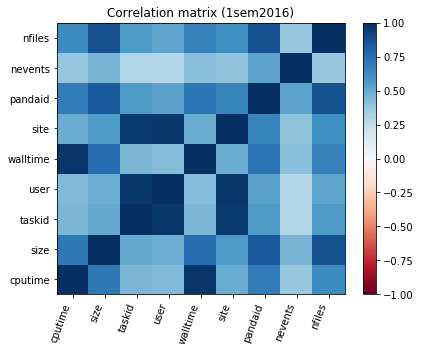

In [903]:
correlations(df_1sem2016_corr, 'matrix (1sem2016)')

In [911]:
df_1sem2016_corr.corr()

,cputime,size,taskid,user,walltime,site,pandaid,nevents,nfiles
cputime,1.000000,0.715266,0.459083,0.441652,0.972325,0.494202,0.700820,0.386683,0.629195
size,0.715266,1.000000,0.511564,0.490527,0.761047,0.564695,0.841335,0.468033,0.873636
taskid,0.459083,0.511564,1.000000,0.968493,0.457701,0.960074,0.567414,0.289966,0.563090
user,0.441652,0.490527,0.968493,1.000000,0.437255,0.964846,0.541424,0.295161,0.526249
walltime,0.972325,0.761047,0.457701,0.437255,1.000000,0.498313,0.732177,0.417326,0.673405
site,0.494202,0.564695,0.960074,0.964846,0.498313,1.000000,0.662109,0.403380,0.618103
pandaid,0.700820,0.841335,0.567414,0.541424,0.732177,0.662109,1.000000,0.537197,0.873387
nevents,0.386683,0.468033,0.289966,0.295161,0.417326,0.403380,0.537197,1.000000,0.387794
nfiles,0.629195,0.873636,0.563090,0.526249,0.673405,0.618103,0.873387,0.387794,1.000000


In [7]:
df_total_corr = df_total.drop([col for col in df_total.columns if 'dsid' in col], axis=1)
df_total_corr = df_total_corr.drop([col for col in df_total_corr.columns if 'ptag' in col], axis=1)
df_total_corr = df_total_corr.drop([col for col in df_total_corr.columns if 'type' in col], axis=1)
df_total_corr = df_total_corr.drop([col for col in df_total_corr.columns if 'scope' in col], axis=1)
df_total_corr = df_total_corr.drop([col for col in df_total_corr.columns if 'name' in col], axis=1)

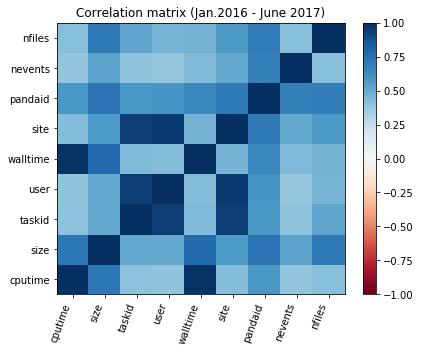

In [913]:
correlations(df_total_corr, 'matrix (Jan.2016 - June 2017)')

In [5]:
df_total = pd.read_hdf('../Matteo/store_access>0.h5', key = 'df_total')

In [8]:
df_total_corr.corr()

,cputime,size,taskid,user,walltime,site,pandaid,nevents,nfiles
cputime,1.000000,0.725848,0.413328,0.401720,0.989500,0.434447,0.584477,0.396983,0.425101
size,0.725848,1.000000,0.509429,0.514399,0.779751,0.568616,0.737192,0.531461,0.711963
taskid,0.413328,0.509429,1.000000,0.947902,0.441616,0.946211,0.578168,0.399751,0.527898
user,0.401720,0.514399,0.947902,1.000000,0.433344,0.956190,0.591913,0.387056,0.466158
walltime,0.989500,0.779751,0.441616,0.433344,1.000000,0.474954,0.646445,0.442044,0.475183
site,0.434447,0.568616,0.946211,0.956190,0.474954,1.000000,0.716812,0.510729,0.572137
pandaid,0.584477,0.737192,0.578168,0.591913,0.646445,0.716812,1.000000,0.676525,0.698816
nevents,0.396983,0.531461,0.399751,0.387056,0.442044,0.510729,0.676525,1.000000,0.423366
nfiles,0.425101,0.711963,0.527898,0.466158,0.475183,0.572137,0.698816,0.423366,1.000000


In [164]:
def checkPrediction(X, Y, bdt):
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import classification_report
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import mean_squared_error
    
    y_predicted = bdt.predict(X)
    print(classification_report(Y, y_predicted, target_names=["background", "signal"]))
    print("Area under ROC curve: %.4f"%(roc_auc_score(Y, bdt.decision_function(X)))) 
    print("MSE (Mean Square Error): %.4f" % (mean_squared_error(Y, y_predicted)))
    return

In [165]:
#confusion matrix

def cmReport(CM):
  
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]


    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN) # signal corrected identified/ (true signal+signal misidentified as background==total true signal)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) # background correctly identified / (true background+background misidentified as signal==total true background)    
    # Precision or positive predictive value
    PPV = TP/(TP+FP) # signal corrected identified/ (true signal+background as signal ==total recognized signal)   
    # Negative predictive value
    NPV = TN/(TN+FN) # background corrected identified/ (true background+ signal as background ==total recognized background)
    # Fall out or false positive rate
    FPR = FP/(FP+TN) # misidentified background/total background

    # False negative rate
    FNR = FN/(TP+FN) # misidentified signal/total signal
    # False discovery rate
    FDR = FP/(TP+FP) # misidentified background/total recognized signal
    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)

    print('TP ' + str(TP) + ' FP '+ str(FP) +' TN ' + str(TN) + ' FN ' + str(FN))
    print('Sensitivity, hit rate, recall, or true positive rate '+str(round(TPR, 3)))
    print('Specificity or true negative rate '+str(round(TNR, 3)))
    print('Precision or positive predictive value '+str(round(PPV, 3)))
    print('Negative predictive value '+str(round(NPV, 3)))
    print('Fall out or false positive rate '+str(round(FPR, 3)))    
    print('False negative rate '+str(round(FNR, 3)))    
    print('False discovery rate '+str(round(FDR, 3)))
    print('overall accuracy '+str(round(ACC, 3)))
    
    return

In [166]:
def plotROC(bdt, X):
    
    from sklearn.metrics import roc_curve, auc

    decisions = bdt.decision_function(X_test)
    
    # Compute ROC curve and area under the curve
    fpr, tpr, thresholds = roc_curve(y_test, decisions)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)'%(roc_auc))

    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate (Background rejection)')
    plt.ylabel('True Positive Rate (Signal efficiency)')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()
    
    return

In [167]:
#Overtraining

def compare_train_test(clf, X_train, y_train, X_test, y_test, bins=30):
    decisions = []
    for X,y in ((X_train, y_train), (X_test, y_test)):
        d1 = clf.decision_function(X[y>0.5]).ravel()
        d2 = clf.decision_function(X[y<0.5]).ravel()
        decisions += [d1, d2]
        
    low = min(np.min(d) for d in decisions)
    high = max(np.max(d) for d in decisions)
    low_high = (low,high)
    
    plt.hist(decisions[0],
             color='r', alpha=0.5, range=low_high, bins=bins,
             histtype='stepfilled', normed=True,
             label='S (train)')
    plt.hist(decisions[1],
             color='b', alpha=0.5, range=low_high, bins=bins,
             histtype='stepfilled', normed=True,
             label='B (train)')

    hist, bins = np.histogram(decisions[2],
                              bins=bins, range=low_high, normed=True)
    scale = len(decisions[2]) / sum(hist)
    err = np.sqrt(hist * scale) / scale
    
    width = (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.errorbar(center, hist, yerr=err, fmt='o', c='r', label='S (test)')
    
    hist, bins = np.histogram(decisions[3],
                              bins=bins, range=low_high, normed=True)
    scale = len(decisions[2]) / sum(hist)
    err = np.sqrt(hist * scale) / scale

    plt.errorbar(center, hist, yerr=err, fmt='o', c='b', label='B (test)')

    plt.xlabel("BDT output")
    plt.ylabel("Arbitrary units")
    plt.legend(loc='best')


In [168]:
df_1sem2017.shape

(114745, 14)

In [169]:
df_1w.shape

(11302, 14)

In [173]:
df_1w[df_1w['user'] > 3].count()

name        934
scope       934
user        934
taskid      934
cputime     934
pandaid     934
size        934
nfiles      934
site        934
walltime    934
nevents     934
dsid        934
ptag        934
type        934
dtype: int64

In [174]:
df_1w['Y_1w'] = np.where(df_1w['user'] > 3, 1, 0)

In [1514]:
df_27w['Y_27w'].sum()

1906

In [175]:
df_1w.head(5)

,name,scope,user,taskid,cputime,pandaid,size,nfiles,site,walltime,nevents,dsid,ptag,type,Y_1w
0,data12_8TeV.00202712.physics_Bphysics.merge.DA...,data12_8TeV,1,1,7208,11,43389319013,13,1,13684,209256,202712,1425,DAOD_JPSIMUMU,0
1,data12_8TeV.00202740.physics_Bphysics.merge.DA...,data12_8TeV,1,1,1854,1,10751529386,3,1,2536,47044,202740,1425,DAOD_JPSIMUMU,0
2,data12_8TeV.00202798.physics_Bphysics.merge.DA...,data12_8TeV,1,1,10124,2,74054089517,21,1,14041,362970,202798,1425,DAOD_JPSIMUMU,0
3,data12_8TeV.00202965.physics_Bphysics.merge.DA...,data12_8TeV,1,1,3665,1,35363904915,11,1,5235,172378,202965,1425,DAOD_JPSIMUMU,0
4,data12_8TeV.00202987.physics_Bphysics.merge.DA...,data12_8TeV,1,1,2503,1,19718220347,6,1,3510,92535,202987,1425,DAOD_JPSIMUMU,0


In [1794]:
result3 = pd.merge(df_1sem2017, df_53w, how='left', left_on=['name', 'scope', 'dsid', 'ptag', 'type'], right_on=['name', 'scope', 'dsid', 'ptag', 'type'])

In [1795]:
result3.shape

(114745, 24)

In [1796]:
result3 = result3.drop(result3.columns[-10:-1], axis =1)

In [1797]:
result3.shape

(114745, 15)

In [1798]:
result3.head(5)

,name,scope,dsid,ptag,type,cputime_x,size_x,taskid_x,user_x,walltime_x,site_x,pandaid_x,nevents_x,nfiles_x,Y_53w
0,data11_7TeV.00178044.physics_Muons.merge.DAOD_...,data11_7TeV,178044,552,DAOD_ONIAMUMU,34435,28091762452,1,1,37447,1,7,231869,7,NaN
1,data11_7TeV.00178044.physics_Muons.merge.DAOD_...,data11_7TeV,178044,811,DAOD_ONIAMUMU,72292,235229777244,9,9,101901,8,63,1992663,63,NaN
2,data11_7TeV.00178047.physics_Muons.merge.DAOD_...,data11_7TeV,178047,552,DAOD_ONIAMUMU,1335,823140562,1,1,1558,1,1,6022,1,NaN
3,data11_7TeV.00178047.physics_Muons.merge.DAOD_...,data11_7TeV,178047,811,DAOD_ONIAMUMU,2468,6685393977,9,9,6189,9,9,51651,9,NaN
4,data11_7TeV.00178109.physics_Muons.merge.DAOD_...,data11_7TeV,178109,552,DAOD_ONIAMUMU,49184,45468965611,1,1,55666,1,10,392430,10,NaN


In [2054]:
df_78w.shape

(17237, 14)

In [2055]:
df_78w[df_78w['user'] > 3].count()

name        1731
scope       1731
nfiles      1731
pandaid     1731
size        1731
taskid      1731
cputime     1731
site        1731
user        1731
nevents     1731
walltime    1731
dsid        1731
ptag        1731
type        1731
dtype: int64

In [2056]:
df_78w['Y_78w'] = np.where(df_78w['user'] > 3, 1, 0)

In [2047]:
df_77w['Y_77w'].sum()

2288

In [2057]:
result3 = pd.merge(result3, df_78w, how='left', left_on=['name', 'scope', 'dsid', 'ptag', 'type'], right_on=['name', 'scope', 'dsid', 'ptag', 'type'])

In [2058]:
result3.shape

(114745, 49)

In [2059]:
result3.head(5)

,name,scope,dsid,ptag,type,cputime_x,size_x,taskid_x,user_x,walltime_x,...,nfiles,pandaid,size,taskid,cputime,site,user,nevents,walltime,Y_78w
0,data11_7TeV.00178044.physics_Muons.merge.DAOD_...,data11_7TeV,178044,552,DAOD_ONIAMUMU,34435,28091762452,1,1,37447,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,data11_7TeV.00178044.physics_Muons.merge.DAOD_...,data11_7TeV,178044,811,DAOD_ONIAMUMU,72292,235229777244,9,9,101901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,data11_7TeV.00178047.physics_Muons.merge.DAOD_...,data11_7TeV,178047,552,DAOD_ONIAMUMU,1335,823140562,1,1,1558,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,data11_7TeV.00178047.physics_Muons.merge.DAOD_...,data11_7TeV,178047,811,DAOD_ONIAMUMU,2468,6685393977,9,9,6189,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,data11_7TeV.00178109.physics_Muons.merge.DAOD_...,data11_7TeV,178109,552,DAOD_ONIAMUMU,49184,45468965611,1,1,55666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2060]:
result3 = result3.drop(result3.columns[-10:-1], axis =1)

In [2061]:
result3.shape

(114745, 40)

In [2062]:
result3

,name,scope,dsid,ptag,type,cputime_x,size_x,taskid_x,user_x,walltime_x,...,Y_69w,Y_70w,Y_71w,Y_72w,Y_73w,Y_74w,Y_75w,Y_76w,Y_77w,Y_78w
0,data11_7TeV.00178044.physics_Muons.merge.DAOD_...,data11_7TeV,178044,552,DAOD_ONIAMUMU,34435,28091762452,1,1,37447,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,data11_7TeV.00178044.physics_Muons.merge.DAOD_...,data11_7TeV,178044,811,DAOD_ONIAMUMU,72292,235229777244,9,9,101901,...,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN
2,data11_7TeV.00178047.physics_Muons.merge.DAOD_...,data11_7TeV,178047,552,DAOD_ONIAMUMU,1335,823140562,1,1,1558,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,data11_7TeV.00178047.physics_Muons.merge.DAOD_...,data11_7TeV,178047,811,DAOD_ONIAMUMU,2468,6685393977,9,9,6189,...,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN
4,data11_7TeV.00178109.physics_Muons.merge.DAOD_...,data11_7TeV,178109,552,DAOD_ONIAMUMU,49184,45468965611,1,1,55666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,data11_7TeV.00178109.physics_Muons.merge.DAOD_...,data11_7TeV,178109,811,DAOD_ONIAMUMU,112838,373981640121,9,9,160414,...,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN
6,data11_7TeV.00179710.physics_Muons.merge.DAOD_...,data11_7TeV,179710,811,DAOD_ONIAMUMU,93296,379411560819,9,9,127466,...,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN
7,data11_7TeV.00179725.physics_Muons.merge.DAOD_...,data11_7TeV,179725,811,DAOD_ONIAMUMU,46525,155202280875,9,9,63651,...,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN
8,data11_7TeV.00179739.physics_Muons.merge.DAOD_...,data11_7TeV,179739,811,DAOD_ONIAMUMU,78902,200654266842,9,9,101185,...,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN
9,data11_7TeV.00179771.physics_Muons.merge.DAOD_...,data11_7TeV,179771,811,DAOD_ONIAMUMU,30564,87977050362,9,9,39836,...,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN


In [2063]:
df_1sem2017_pop = result3

In [1772]:
df_2sem2016_pop = result2

In [772]:
colonnePOP = pd.HDFStore('colonnePOP.h5')

In [2066]:
colonnePOP

<class 'pandas.io.pytables.HDFStore'>
File path: colonnePOP.h5
/df_1sem2016_pop            frame        (shape->[1,40])
/df_1sem2017_pop            frame        (shape->[1,40])
/df_2sem2016_pop            frame        (shape->[1,40])

In [176]:
df_1sem2016_pop = pd.read_hdf('../Matteo/colonnePOP.h5', key='df_1sem2016_pop')

In [2465]:
result = pd.read_hdf('../Matteo/colonnePOP.h5', key='df_1sem2016_pop')

In [775]:
colonnePOP['df_1sem2016_pop'] = df_1sem2016_pop

In [1774]:
colonnePOP['df_2sem2016_pop'] = df_2sem2016_pop

In [2065]:
colonnePOP['df_1sem2017_pop'] = df_1sem2017_pop

In [2067]:
result3New = result3.fillna(0)

In [2068]:
x3 = result3New.values[:, -26:]

In [2069]:
x3

array([[0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       ..., 
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0]], dtype=object)

In [2070]:
x3.shape

(114745, 26)

In [2071]:
sumList3 = np.sum(x3,axis=1).tolist()

In [2072]:
max(sumList3)

25.0

In [2073]:
from collections import Counter
Counter(sumList3)

Counter({0.0: 99708,
         1.0: 7722,
         2.0: 2462,
         3.0: 1244,
         4.0: 640,
         5.0: 450,
         6.0: 395,
         7.0: 352,
         8.0: 257,
         9.0: 215,
         10.0: 225,
         11.0: 197,
         12.0: 156,
         13.0: 137,
         14.0: 92,
         15.0: 59,
         16.0: 46,
         17.0: 31,
         18.0: 37,
         19.0: 50,
         20.0: 75,
         21.0: 72,
         22.0: 100,
         23.0: 21,
         24.0: 1,
         25.0: 1})

In [827]:
nPopWeeks = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26])

In [828]:
nData = np.array([107409,8010,3082,1123,496,638,471,232,158,119,96,102,80,77,86,72,61,44,34,20,7,3,6,1,0,0,0])

In [1784]:
nData2 = np.array([94909,4518,1380,755,526,394,233,237,227,169,190,183,191,185,147,149,92,79,67,39,23,24,17,15,29,29,119])

In [2074]:
nData3 = np.array([99708,7722,2462,1244,640,450,395,352,257,215,225,197,156,137,92,59,46,31,37,50,75,72,100,21,1,1,0])

In [2588]:
df_spop = pd.DataFrame()

In [2590]:
df_spop['1sem2016'] = pd.Series(nData)

In [2591]:
df_spop['2sem2016'] = pd.Series(nData2)

In [2592]:
df_spop['1sem2017'] = pd.Series(nData3)

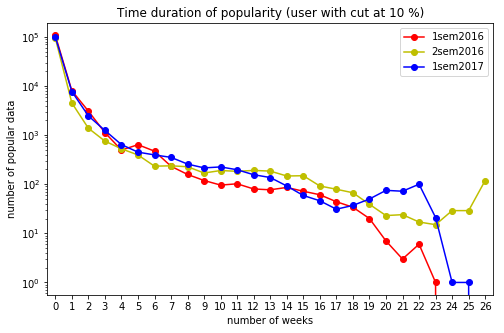

In [5564]:
df_spop.plot(y=['1sem2016', '2sem2016', '1sem2017'], marker = 'o', color = ['r', 'y', 'b'], figsize=(8,5))
plt.xticks(df_spop.index)
plt.yscale('log')
plt.title('Time duration of popularity (user with cut at 10 %)')
plt.xlabel('number of weeks')
plt.ylabel('number of popular data')
plt.xlim(-0.5, 26.5)
plt.show()

([<matplotlib.axis.XTick at 0x7fa5308cb2e8>,
 <a list of 27 Text xticklabel objects>)

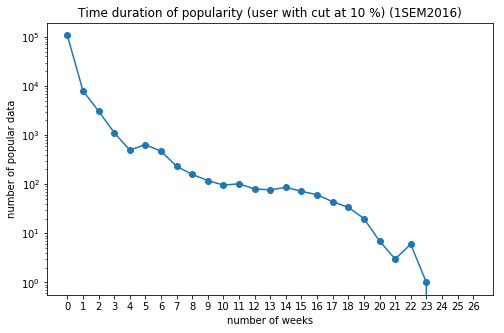

In [959]:
plt.figure(figsize=(8,5))
fig = plt.plot(nPopWeeks, nData, marker = 'o')
plt.yscale('log')
plt.title('Time duration of popularity (user with cut at 10 %) (1SEM2016)')
plt.xlabel('number of weeks')
plt.ylabel('number of popular data')
plt.xticks(nPopWeeks)

(0.57, 180000)

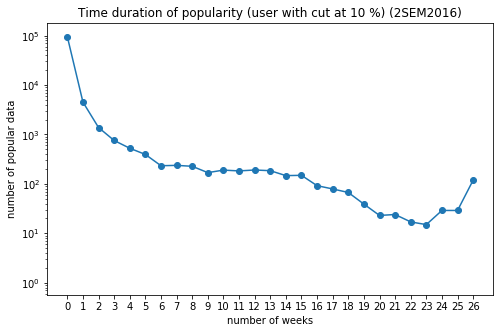

In [2289]:
plt.figure(figsize=(8,5))
fig = plt.plot(nPopWeeks, nData2, marker = 'o')
plt.yscale('log')
plt.title('Time duration of popularity (user with cut at 10 %) (2SEM2016)')
plt.xlabel('number of weeks')
plt.ylabel('number of popular data')
plt.xticks(nPopWeeks)
plt.ylim(0.57,180000)

([<matplotlib.axis.XTick at 0x7fa531459c50>,
 <a list of 27 Text xticklabel objects>)

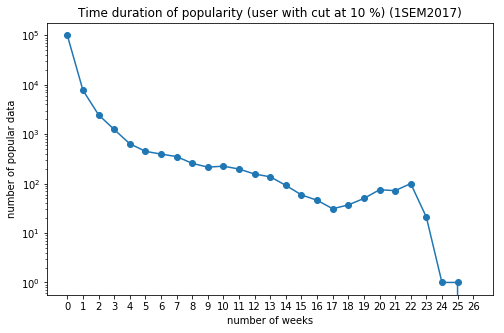

In [2075]:
plt.figure(figsize=(8,5))
fig = plt.plot(nPopWeeks, nData3, marker = 'o')
plt.yscale('log')
plt.title('Time duration of popularity (user with cut at 10 %) (1SEM2017)')
plt.xlabel('number of weeks')
plt.ylabel('number of popular data')
plt.xticks(nPopWeeks)

In [185]:
result = df_1sem2016_pop

In [186]:
result = result.fillna(0)

In [189]:
result.head(5)

,name,scope,dsid,ptag,type,cputime_x,size_x,taskid_x,user_x,walltime_x,...,Y_17w,Y_18w,Y_19w,Y_20w,Y_21w,Y_22w,Y_23w,Y_24w,Y_25w,Y_26w
0,data11_7TeV.00178044.physics_Muons.merge.DAOD_...,data11_7TeV,178044,811,DAOD_ONIAMUMU,32586,209093135328,8,8,60435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,data11_7TeV.00178047.physics_Muons.merge.DAOD_...,data11_7TeV,178047,811,DAOD_ONIAMUMU,1401,5942572424,8,8,3720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,data11_7TeV.00178109.physics_Muons.merge.DAOD_...,data11_7TeV,178109,811,DAOD_ONIAMUMU,91322,373981640121,10,10,182843,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,data11_7TeV.00179710.physics_Muons.merge.DAOD_...,data11_7TeV,179710,811,DAOD_ONIAMUMU,52033,337254720728,9,9,88649,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,data11_7TeV.00179725.physics_Muons.merge.DAOD_...,data11_7TeV,179725,811,DAOD_ONIAMUMU,21981,137957583000,8,8,35439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [190]:
df_X = result

In [2705]:
df_X = result.drop('Y_1w', axis = 1)

In [2706]:
df_X.shape

(122427, 39)

In [2604]:
df_X = pd.merge(df_X, df_27w, how='left', left_on=['name', 'scope', 'dsid', 'ptag', 'type'], right_on=['name', 'scope', 'dsid', 'ptag', 'type'])

In [2874]:
df_X.head(5)

,name,scope,dsid,ptag,type,pandaid_x,nfiles_x,user_x,nevents_x,taskid_x,...,Y_18w,Y_19w,Y_20w,Y_21w,Y_22w,Y_23w,Y_24w,Y_25w,Y_26w,Y_27w
0,data11_7TeV.00178044.physics_Muons.merge.DAOD_...,data11_7TeV,178044,811,DAOD_ONIAMUMU,51,56,8,1771256,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,data11_7TeV.00178047.physics_Muons.merge.DAOD_...,data11_7TeV,178047,811,DAOD_ONIAMUMU,8,8,8,45912,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,data11_7TeV.00178109.physics_Muons.merge.DAOD_...,data11_7TeV,178109,811,DAOD_ONIAMUMU,84,99,10,3320622,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,data11_7TeV.00179710.physics_Muons.merge.DAOD_...,data11_7TeV,179710,811,DAOD_ONIAMUMU,80,88,9,2599976,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,data11_7TeV.00179725.physics_Muons.merge.DAOD_...,data11_7TeV,179725,811,DAOD_ONIAMUMU,32,40,8,1015208,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [216]:
df_X.shape

(122427, 40)

In [2224]:
df_X = df_X.drop(df_X.columns[-10:-1], axis =1)

In [981]:
df_X = df_X.drop('Y_27w_x', axis = 1)

In [2205]:
df_X0 = df_X.drop('Y_26w', axis = 1)

In [2183]:
df_X = df_X.drop('Y_1w', axis = 1)

In [5474]:
df_X.columns = df_X.columns.str.replace('_x','')

In [5475]:
df_X.shape

(132733, 40)

In [5476]:
df_X['user'].sum()

1244494

In [5477]:
df_X = df_X.drop('Y_36w', axis = 1)

In [5478]:
df_Xp = pd.concat([df_X.loc[:, ['name', 'scope', 'dsid', 'ptag', 'type', 'cputime', 'size', 'taskid', 'user', 'walltime', 'site',
                'pandaid', 'nevents', 'nfiles']], df_36w.loc[:, ['name', 'scope', 'dsid', 'ptag', 'type', 'cputime', 'size', 'taskid',
                    'user', 'walltime', 'site', 'pandaid', 'nevents', 'nfiles']], df_36w.loc[:, ['name', 'scope', 'dsid', 'ptag',
                    'type', 'cputime', 'size', 'taskid', 'user', 'walltime', 'site', 'pandaid', 'nevents', 'nfiles']]]).drop_duplicates(keep=False)

In [5479]:
df_Xp.shape

(132015, 14)

In [5480]:
df_Xp['user'].sum()

1243663

In [5481]:
def diffDF(df, df_new):

    df_newer = pd.DataFrame()
    df_newer['name'] = df_new['name']
    df_newer['scope'] = df_new['scope']
    df_newer['dsid'] = df_new['dsid']
    df_newer['ptag'] = df_new['ptag']
    df_newer['type'] = df_new['type']
    df_newer['pandaid'] = - df_new['pandaid']
    df_newer['user'] = - df_new['user']
    df_newer['site'] = - df_new['site']
    df_newer['taskid'] = - df_new['taskid']
    df_newer['cputime'] = - df_new['cputime']
    df_newer['walltime'] = - df_new['walltime']
    df_newer['nevents'] = - df_new['nevents']
    df_newer['nfiles'] = - df_new['nfiles']
    df_newer['size'] = - df_new['size']
 
    concatenated = pd.concat([df, df_newer]) 

    
    #drop date, sum over pandaids, sites, users, ...
    result = concatenated.groupby(['name','scope','dsid','ptag','type']).agg({"pandaid": np.sum, "user": np.sum,  "site": np.sum,
        "taskid": pd.Series.sum, "cputime": pd.Series.sum, "walltime": pd.Series.sum, "nevents": pd.Series.sum, 
        "nfiles": pd.Series.sum, "size": pd.Series.sum   # sum over unique pandaids, taskids, sites, users. Get the total/day for all the rest  
    }).reset_index()
  
    
    return result

In [5482]:
prova = diffDF(df_Xp, df_36w)

In [5483]:
prova.shape

(132810, 14)

In [5484]:
prova['user'].sum()

1219911

In [5485]:
for cols in prova.columns.tolist()[5:]:
    prova1 = prova.loc[prova[cols] > 0].reset_index().drop('index', axis =1)

In [5486]:
prova1.shape

(132001, 14)

In [5487]:
prova1['user'].sum()

1220822

In [5488]:
prova2 = mergeDF(prova1, df_62w)

In [5489]:
prova2.shape

(135895, 14)

In [5490]:
df_X1 =  df_X.drop([col for col in df_X.columns if 'size' in col], axis=1)
df_X1 =  df_X1.drop([col for col in df_X1.columns if 'pandaid' in col], axis=1)
df_X1 =  df_X1.drop([col for col in df_X1.columns if 'nfiles' in col], axis=1)
df_X1 =  df_X1.drop([col for col in df_X1.columns if 'walltime' in col], axis=1)
df_X1 =  df_X1.drop([col for col in df_X1.columns if 'cputime' in col], axis=1)
df_X1 =  df_X1.drop([col for col in df_X1.columns if 'nevents' in col], axis=1)
df_X1 =  df_X1.drop([col for col in df_X1.columns if 'user' in col], axis=1)
df_X1 =  df_X1.drop([col for col in df_X1.columns if 'site' in col], axis=1)
df_X1 =  df_X1.drop([col for col in df_X1.columns if 'taskid' in col], axis=1)

In [5491]:
df_X1.shape

(132733, 30)

In [5492]:
df_X1.head(5)

,name,scope,dsid,ptag,type,Y_37w,Y_38w,Y_39w,Y_40w,Y_41w,...,Y_52w,Y_53w,Y_54w,Y_55w,Y_56w,Y_57w,Y_58w,Y_59w,Y_60w,Y_61w
0,data11_7TeV.00178044.physics_Muons.merge.DAOD_...,data11_7TeV,178044,811,DAOD_ONIAMUMU,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,data11_7TeV.00178047.physics_Muons.merge.DAOD_...,data11_7TeV,178047,811,DAOD_ONIAMUMU,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,data11_7TeV.00178109.physics_Muons.merge.DAOD_...,data11_7TeV,178109,811,DAOD_ONIAMUMU,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,data11_7TeV.00179710.physics_Muons.merge.DAOD_...,data11_7TeV,179710,811,DAOD_ONIAMUMU,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,data11_7TeV.00179725.physics_Muons.merge.DAOD_...,data11_7TeV,179725,811,DAOD_ONIAMUMU,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5493]:
prova3 = pd.merge(prova2, df_X1, how='left', left_on=['name', 'scope', 'dsid', 'ptag', 'type'], right_on=['name', 'scope', 'dsid',
                 'ptag', 'type'])

In [5494]:
prova3.shape

(135895, 39)

In [5495]:
prova3.head(5)

,name,scope,dsid,ptag,type,pandaid,nfiles,user,nevents,taskid,...,Y_52w,Y_53w,Y_54w,Y_55w,Y_56w,Y_57w,Y_58w,Y_59w,Y_60w,Y_61w
0,data11_7TeV.00178044.physics_Muons.merge.DAOD_...,data11_7TeV,178044,811,DAOD_ONIAMUMU,14,14,2,442814,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,data11_7TeV.00178047.physics_Muons.merge.DAOD_...,data11_7TeV,178047,811,DAOD_ONIAMUMU,2,2,2,11478,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,data11_7TeV.00178109.physics_Muons.merge.DAOD_...,data11_7TeV,178109,811,DAOD_ONIAMUMU,21,22,2,737916,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,data11_7TeV.00179710.physics_Muons.merge.DAOD_...,data11_7TeV,179710,811,DAOD_ONIAMUMU,22,22,2,649994,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,data11_7TeV.00179725.physics_Muons.merge.DAOD_...,data11_7TeV,179725,811,DAOD_ONIAMUMU,9,10,2,253802,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5496]:
df_X = pd.merge(prova3, df_62w, how='left', left_on=['name', 'scope', 'dsid', 'ptag', 'type'], right_on=['name', 'scope', 'dsid', 'ptag', 'type'])

In [5497]:
df_X = df_X.drop(df_X.columns[-10:-1], axis =1)

In [5498]:
df_X.head(5)

,name,scope,dsid,ptag,type,pandaid_x,nfiles_x,user_x,nevents_x,taskid_x,...,Y_53w,Y_54w,Y_55w,Y_56w,Y_57w,Y_58w,Y_59w,Y_60w,Y_61w,Y_62w
0,data11_7TeV.00178044.physics_Muons.merge.DAOD_...,data11_7TeV,178044,811,DAOD_ONIAMUMU,14,14,2,442814,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,data11_7TeV.00178047.physics_Muons.merge.DAOD_...,data11_7TeV,178047,811,DAOD_ONIAMUMU,2,2,2,11478,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,data11_7TeV.00178109.physics_Muons.merge.DAOD_...,data11_7TeV,178109,811,DAOD_ONIAMUMU,21,22,2,737916,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,data11_7TeV.00179710.physics_Muons.merge.DAOD_...,data11_7TeV,179710,811,DAOD_ONIAMUMU,22,22,2,649994,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,data11_7TeV.00179725.physics_Muons.merge.DAOD_...,data11_7TeV,179725,811,DAOD_ONIAMUMU,9,10,2,253802,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [5499]:
df_X = df_X.fillna(0)

In [5500]:
df_X.shape

(135895, 40)

In [5501]:
df_X5 = pd.merge(df_X, df_63w, how='left', left_on=['name', 'scope', 'dsid', 'ptag', 'type'], right_on=['name', 'scope', 'dsid', 'ptag', 'type'])

In [5502]:
df_X5 = df_X5.fillna(0)

In [5503]:
Y = df_X5['Y_63w']

In [5504]:
df_X0 = df_X5.drop(df_X5.columns[-10:], axis =1)

In [5505]:
df_X0 = df_X0.drop('Y_37w', axis = 1)

In [5506]:
df_X0.head(5)

,name,scope,dsid,ptag,type,pandaid_x,nfiles_x,user_x,nevents_x,taskid_x,...,Y_53w,Y_54w,Y_55w,Y_56w,Y_57w,Y_58w,Y_59w,Y_60w,Y_61w,Y_62w
0,data11_7TeV.00178044.physics_Muons.merge.DAOD_...,data11_7TeV,178044,811,DAOD_ONIAMUMU,14,14,2,442814,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,data11_7TeV.00178047.physics_Muons.merge.DAOD_...,data11_7TeV,178047,811,DAOD_ONIAMUMU,2,2,2,11478,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,data11_7TeV.00178109.physics_Muons.merge.DAOD_...,data11_7TeV,178109,811,DAOD_ONIAMUMU,21,22,2,737916,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,data11_7TeV.00179710.physics_Muons.merge.DAOD_...,data11_7TeV,179710,811,DAOD_ONIAMUMU,22,22,2,649994,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,data11_7TeV.00179725.physics_Muons.merge.DAOD_...,data11_7TeV,179725,811,DAOD_ONIAMUMU,9,10,2,253802,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [191]:
Y = df_X['Y_26w']

In [192]:
Y = Y.as_matrix().astype(np.float)

In [193]:
Y

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [194]:
df_X0 = df_X.drop('Y_26w', axis = 1)

In [195]:
Y.sum()

2308.0

In [5457]:
df_62w.shape

(26697, 15)

In [5456]:
Y.sum()

2479.0

In [2998]:
len(Y)

128318

In [196]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
cv_scope = cv.fit_transform(list(df_X0.scope))
cv_scope_array = cv_scope.toarray()
print(cv_scope_array)
print(type(cv_scope_array))

[[1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 1]
 [0 0 0 ..., 0 0 1]
 [0 0 0 ..., 0 0 1]]
<class 'numpy.ndarray'>


In [197]:
cv_scope_array.shape

(122427, 10)

In [198]:
tv = CountVectorizer()
tv_type=tv.fit_transform(list(df_X0.type))
tv_type_array = tv_type.toarray()
print(tv_type_array)
print(type(tv_type_array))

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
<class 'numpy.ndarray'>


In [199]:
tv_type_array.shape

(122427, 102)

In [200]:
df_X1 =  df_X0.drop([col for col in df_X0.columns if 'type' in col], axis=1)
df_X1 =  df_X1.drop([col for col in df_X1.columns if 'scope' in col], axis=1)
df_X1 =  df_X1.drop([col for col in df_X1.columns if 'name' in col], axis=1)

In [201]:
df_X1 =  df_X1.drop([col for col in df_X1.columns if 'size' in col], axis=1)
df_X1 =  df_X1.drop([col for col in df_X1.columns if 'pandaid' in col], axis=1)
df_X1 =  df_X1.drop([col for col in df_X1.columns if 'nfiles' in col], axis=1)
df_X1 =  df_X1.drop([col for col in df_X1.columns if 'walltime' in col], axis=1)
df_X1 =  df_X1.drop([col for col in df_X1.columns if 'cputime' in col], axis=1)

In [202]:
df_X1 =  df_X1.drop([col for col in df_X1.columns if 'nevents' in col], axis=1)
df_X1 =  df_X1.drop([col for col in df_X1.columns if 'user' in col], axis=1)
df_X1 =  df_X1.drop([col for col in df_X1.columns if 'site' in col], axis=1)
df_X1 =  df_X1.drop([col for col in df_X1.columns if 'taskid' in col], axis=1)
#df_X =  df_X.drop([col for col in df_X.columns if 'ptag' in col], axis=1)
#df_X =  df_X.drop([col for col in df_X.columns if 'dsid' in col], axis=1)

In [203]:
df_X1.head(5)

,dsid,ptag,Y_1w,Y_2w,Y_3w,Y_4w,Y_5w,Y_6w,Y_7w,Y_8w,...,Y_16w,Y_17w,Y_18w,Y_19w,Y_20w,Y_21w,Y_22w,Y_23w,Y_24w,Y_25w
0,178044,811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,178047,811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,178109,811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,179710,811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,179725,811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [204]:
X = df_X1.as_matrix().astype(np.float)

In [205]:
X.shape

(122427, 27)

In [206]:
X = np.concatenate((cv_scope_array, X), axis = 1)

In [207]:
X.shape

(122427, 37)

In [208]:
X = np.concatenate((tv_type_array, X), axis = 1)

In [209]:
X.shape

(122427, 139)

In [211]:
from sklearn.model_selection import train_test_split

#first split into development (to optimise hyperparameters) and evaluation (to train+test final model) samples
#X_dev,X_eval, y_dev,y_eval = train_test_split(X, Y, test_size=0.50, random_state=42)
#X = X_eval
#Y = y_eval

#print('Used for development (hyperparameters optimization): '+str(len(y_dev)))
#print('Used for training+testing: '+str(len(y_eval)))

X_train, X_test, y_train,y_test = train_test_split(X, Y, test_size=0.33, random_state=492)

print('Used for training: '+str(len(y_train)))
print('Used for testing:  '+str(len(y_test)))

Used for training: 82026
Used for testing:  40401


In [212]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score

dt = DecisionTreeClassifier(max_depth=11)

bdt = AdaBoostClassifier(dt,
                         algorithm='SAMME',
                         n_estimators=30, #was 800
                         learning_rate=0.1)

bdt.fit(X_train, y_train)

#save model
#pickle.dump(bdt, open(filename+'_bdt.sav', 'wb'))

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.1, n_estimators=30, random_state=None)

In [213]:
checkPrediction(X_test, y_test, bdt)

             precision    recall  f1-score   support

 background       1.00      1.00      1.00     39637
     signal       0.90      0.81      0.85       764

avg / total       0.99      0.99      0.99     40401

Area under ROC curve: 0.9841
MSE (Mean Square Error): 0.0053


In [214]:
checkPrediction(X_train, y_train, bdt)

             precision    recall  f1-score   support

 background       1.00      1.00      1.00     80482
     signal       0.98      0.89      0.94      1544

avg / total       1.00      1.00      1.00     82026

Area under ROC curve: 0.9998
MSE (Mean Square Error): 0.0023


In [5472]:
checkPrediction(X, Y, bdt)

             precision    recall  f1-score   support

 background       0.99      0.99      0.99    130254
     signal       0.46      0.33      0.39      2479

avg / total       0.98      0.98      0.98    132733

Area under ROC curve: 0.8133
MSE (Mean Square Error): 0.0198


In [215]:
#Look at confusion matrix
#TN|FP - background OK - background as signal
#FN|TP - signal as background - signal OK
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, bdt.predict(X_test))
#display(CM)
cmReport(CM)

TP 622 FP 71 TN 39566 FN 142
Sensitivity, hit rate, recall, or true positive rate 0.814
Specificity or true negative rate 0.998
Precision or positive predictive value 0.898
Negative predictive value 0.996
Fall out or false positive rate 0.002
False negative rate 0.186
False discovery rate 0.102
overall accuracy 0.995


In [5473]:
#Look at confusion matrix
#TN|FP - background OK - background as signal
#FN|TP - signal as background - signal OK
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(Y, bdt.predict(X))
#display(CM)
cmReport(CM)

TP 829 FP 978 TN 129276 FN 1650
Sensitivity, hit rate, recall, or true positive rate 0.334
Specificity or true negative rate 0.992
Precision or positive predictive value 0.459
Negative predictive value 0.987
Fall out or false positive rate 0.008
False negative rate 0.666
False discovery rate 0.541
overall accuracy 0.98


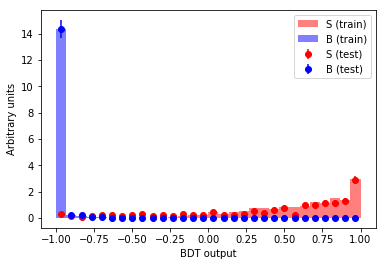

In [3884]:
compare_train_test(bdt, X_train, y_train, X_test, y_test)

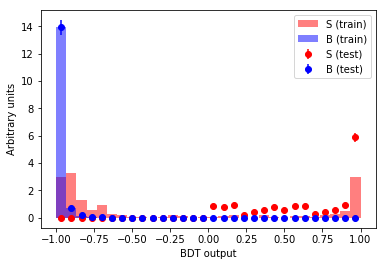

In [3456]:
compare_train_test(bdt, X, Y, X, bdt.predict(X))

In [5530]:
df_pred = pd.DataFrame()

In [5533]:
df_pred['week'] = pd.Series(i for i in range(27, 59))

In [5536]:
df_pred['TPR'] = pd.Series([58.3, 67.7, 60.8, 63, 43,48.6,40.6,53,32.4,38.1,50,35.6,35.3,35.2,53.9,46.6,62.5,53.3,48.4,48.8,59.1,
                           62.9,40.1,47.3,41.2,29,27.9,8,45.2,50.8,54.9,64.6])

In [5538]:
df_pred['FPR'] = pd.Series([0.5,0.5,0.5,0.7,0.7,0.3,0.2,0.3,0.2,0.4,0.4,0.4,0.3,0.5,0.3,0.3,0.3,0.3,0.4,0.3,0.6,0.6,0.5,0.8,0.4,
                            0.5,0.4,0.5,0.3,0.5,0.3,0.4])

In [5539]:
df_pred['Precision'] = pd.Series([65.2,66.7,64.5,57.2,40.5,53.4,61.4,57.4,58.1,51.2,49,46,59.7,49,66.6,70.7,70.5,70.6,61.2,79.4,
                                 62,62.1,57.4,49.5,67.3,45.7,39.8,19.6,73.9,62.3,73.5,69.2])

In [5540]:
df_pred

,week,TPR,FPR,Precision
0,27,58.3,0.5,65.2
1,28,67.7,0.5,66.7
2,29,60.8,0.5,64.5
3,30,63.0,0.7,57.2
4,31,43.0,0.7,40.5
5,32,48.6,0.3,53.4
6,33,40.6,0.2,61.4
7,34,53.0,0.3,57.4
8,35,32.4,0.2,58.1
9,36,38.1,0.4,51.2


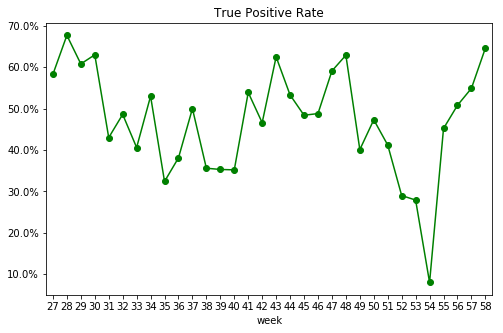

In [5559]:
plt.figure()
ax = df_pred.plot(x='week', y='TPR', marker = 'o', color = 'g', figsize=(8,5))
#plt.yscale('log')
plt.title('True Positive Rate')
plt.xlabel('week')
#plt.ylabel('number of popular data')
plt.xticks(df_pred.week)
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.1f}%'.format(x) for x in vals])
plt.xlim(26.5, 58.5)
ax.legend_.remove()
plt.show()

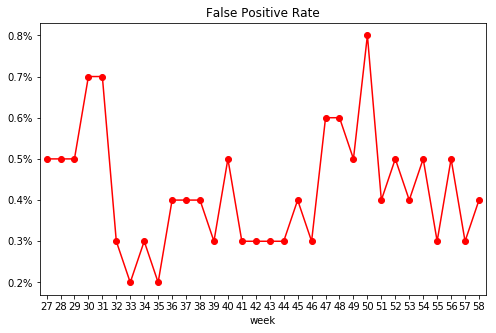

In [5560]:
plt.figure()
ax = df_pred.plot(x='week', y='FPR', marker = 'o', color = 'r', figsize=(8,5))
#plt.yscale('log')
plt.title('False Positive Rate')
plt.xlabel('week')
#plt.ylabel('number of popular data')
plt.xticks(df_pred.week)
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.1f}%'.format(x) for x in vals])
plt.xlim(26.5, 58.5)
ax.legend_.remove()
plt.show()

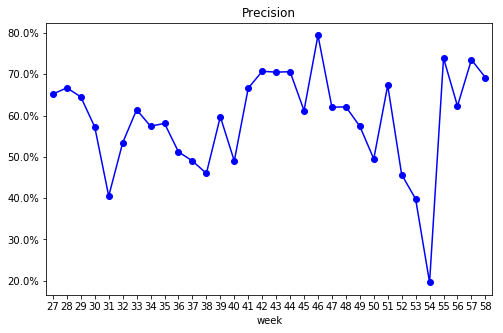

In [5561]:
plt.figure()
ax = df_pred.plot(x='week', y='Precision', marker = 'o', color = 'b', figsize=(8,5))
#plt.yscale('log')
plt.title('Precision')
plt.xlabel('week')
#plt.ylabel('number of popular data')
plt.xticks(df_pred.week)
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.1f}%'.format(x) for x in vals])
plt.xlim(26.5, 58.5)
ax.legend_.remove()
plt.show()

In [2583]:
from sklearn.model_selection import GridSearchCV

# Perform grid search over all combinations of these hyper-parameters
param_grid = {"n_estimators": [10, 30, 80, 150], #takes forever
              'base_estimator__max_depth':[3,5,8,12,17,25], #"max_depth": [1, 3, 8],
              'learning_rate': [0.1, 0.5, 1., 1.5]}

clf = GridSearchCV(bdt,
                param_grid,
                cv=3,
                scoring='roc_auc',
                n_jobs=8)

_ = clf.fit(X_dev, y_dev)

In [2584]:
# Utility function to report best scores
def report(results, n_top=10):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.4f} (std: {1:.4f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [2585]:
report(clf.cv_results_)

Model with rank: 1
Mean validation score: 0.9944 (std: 0.0014)
Parameters: {'learning_rate': 1.5, 'n_estimators': 150, 'base_estimator__max_depth': 3}

Model with rank: 2
Mean validation score: 0.9944 (std: 0.0009)
Parameters: {'learning_rate': 1.0, 'n_estimators': 150, 'base_estimator__max_depth': 5}

Model with rank: 3
Mean validation score: 0.9943 (std: 0.0015)
Parameters: {'learning_rate': 1.5, 'n_estimators': 80, 'base_estimator__max_depth': 3}

Model with rank: 4
Mean validation score: 0.9937 (std: 0.0010)
Parameters: {'learning_rate': 1.0, 'n_estimators': 80, 'base_estimator__max_depth': 5}

Model with rank: 5
Mean validation score: 0.9936 (std: 0.0004)
Parameters: {'learning_rate': 1.5, 'n_estimators': 150, 'base_estimator__max_depth': 5}

Model with rank: 6
Mean validation score: 0.9936 (std: 0.0010)
Parameters: {'learning_rate': 0.5, 'n_estimators': 150, 'base_estimator__max_depth': 5}

Model with rank: 7
Mean validation score: 0.9931 (std: 0.0008)
Parameters: {'learning_rate

In [1442]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# Perform random search over all combinations of these hyper-parameters
param_grid = {"n_estimators": sp_randint(1, 1001),
              'base_estimator__max_depth':sp_randint(1, 41), 
              'learning_rate': np.linspace(0.1,1.5, 15)   # NON VA CON QUESTO
             }

# run randomized search
n_iter_search = 40

rnd = RandomizedSearchCV(bdt, param_grid, n_iter=n_iter_search)
_ = rnd.fit(X_dev, y_dev)

In [1443]:
report(rnd.cv_results_)

Model with rank: 1
Mean validation score: 0.9943 (std: 0.0004)
Parameters: {'learning_rate': 0.79999999999999993, 'n_estimators': 590, 'base_estimator__max_depth': 10}

Model with rank: 2
Mean validation score: 0.9942 (std: 0.0003)
Parameters: {'learning_rate': 0.10000000000000001, 'n_estimators': 30, 'base_estimator__max_depth': 11}

Model with rank: 3
Mean validation score: 0.9941 (std: 0.0003)
Parameters: {'learning_rate': 0.40000000000000002, 'n_estimators': 518, 'base_estimator__max_depth': 17}

Model with rank: 4
Mean validation score: 0.9941 (std: 0.0004)
Parameters: {'learning_rate': 0.69999999999999996, 'n_estimators': 627, 'base_estimator__max_depth': 17}

Model with rank: 4
Mean validation score: 0.9941 (std: 0.0003)
Parameters: {'learning_rate': 0.69999999999999996, 'n_estimators': 322, 'base_estimator__max_depth': 22}

Model with rank: 4
Mean validation score: 0.9941 (std: 0.0004)
Parameters: {'learning_rate': 1.5, 'n_estimators': 713, 'base_estimator__max_depth': 18}

Mod

In [2576]:
# Split development set into a train and test sample
X_train,X_test, y_train,y_test = train_test_split(X_dev, y_dev, test_size=0.33, random_state=4685)

bdts = []
params = ((0.1,11), (0.2,11),
          (0.3,11), (0.5,11))

for learn,depth in params:
    dt = DecisionTreeClassifier(max_depth=depth)
    gbt_bdt = AdaBoostClassifier(dt,
                         algorithm='SAMME',
                         n_estimators=1250, #was 800
                         learning_rate=learn)

    gbt_bdt.fit(X_train, y_train)
    bdts.append(gbt_bdt)

In [2577]:
def validation_curve(bdts, train, test):
    X_test, y_test = test
    X_train, y_train = train
    
    for n,clf in enumerate(bdts):
        test_score = np.empty(len(clf.estimators_))
        train_score = np.empty(len(clf.estimators_))

        for i, pred in enumerate(clf.staged_decision_function(X_test)):
            test_score[i] = 1-roc_auc_score(y_test, pred)

        for i, pred in enumerate(clf.staged_decision_function(X_train)):
            train_score[i] = 1-roc_auc_score(y_train, pred)

        best_iter = np.argmin(test_score)
        learn = clf.get_params()['learning_rate']
        depth = clf.get_params()['base_estimator__max_depth']
        test_line = plt.plot(test_score,
                             label='learn=%.1f depth=%i (%.4f)'%(learn,depth,
                                                                 test_score[best_iter]))

        colour = test_line[-1].get_color()
        plt.plot(train_score, '--', color=colour)
        
        plt.xlabel("Number of boosting iterations")
        plt.ylabel("1 - area under ROC")
        plt.axvline(x=best_iter, color=colour)
        plt.ylim(-0.002, 0.038)
        
    plt.legend(loc='best')

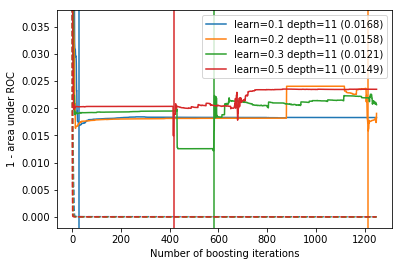

In [2578]:
validation_curve(bdts,
                 (X_train,y_train),
                 (X_test,y_test))

In [ ]:
from sklearn.model_selection import learning_curve

# Taken more or less straight from
# http://scikit-learn.org/stable/auto_examples/plot_learning_curve.html
def plot_learning_curve(estimator, title, X, y, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5),
                        scoring=None, ax=None, xlabel=True):
    if ax is None:
        plt.figure()
        ax.title(title)
    
    if xlabel:
        ax.set_xlabel("Training examples")
        
    ax.set_ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator,
                                                            X, y,
                                                            cv=cv,
                                                            n_jobs=n_jobs,
                                                            train_sizes=train_sizes,
                                                            scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    ax.set_ylim([0.89, 1.01])
    return plt


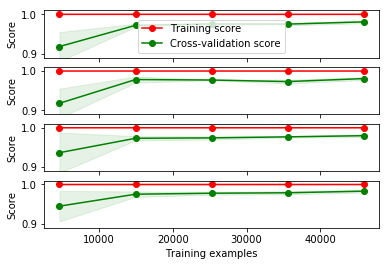

In [ ]:
classifiers = [bdts[0], bdts[1], bdts[2], bdts[3]]

plt.figure(figsize=(40,40))
fig, axes = plt.subplots(nrows=len(classifiers), sharex=True)

for clf, ax in zip(classifiers, axes):  
    plot_learning_curve(clf,
                        "Learning curves",
                        X_dev, y_dev,
                        scoring='roc_auc',
                        n_jobs=7, cv=4,
                        ax=ax, xlabel=False)
    
axes[0].legend(loc="best")
axes[-1].set_xlabel("Training examples")

In [2249]:
cv.get_feature_names()

['data11_7tev',
 'data12_8tev',
 'data15_13tev',
 'data15_5tev',
 'data15_hi',
 'data16_13tev',
 'mc12_14tev',
 'mc15_13tev',
 'mc15_14tev',
 'mc15_valid']

In [2250]:
np.where(bdt.predict(X) == 1)

(array([  2928,   2990,   3059, ..., 121915, 121933, 122195]),)

In [2251]:
np.where(Y == 1)

(array([  1559,   1655,   1752, ..., 121306, 122144, 122195]),)

In [2252]:
X[np.where(bdt.predict(X) == 1), :].sum(axis = 1).sum(axis = 0)

array([  0.00000000e+00,   2.60000000e+01,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   2.78000000e+02,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   1.38000000e+02,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   3.00000000e+01,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

In [2253]:
np.delete(X[np.where(bdt.predict(X) == 1), :].sum(axis = 1).sum(axis = 0), [i for i in range(112,139)])

array([   0.,   26.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,  278.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,  138.,    0.,
          0.,    0.,    0.,    0.,    0.,   30.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,
          0.,    0.,    0.,    1.,  102.,    0.,    0.,    0.,    0.,
         11.,    6.,    0.,    0.,   11.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    5.,  328.,
          0.,    4.,    0.,  236.,    0.,    0.,    2.,    0.,    0.,
          0.,    0.,    0.,  454.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,  465.,    0.,    0.,  262.,
          0.,  906.,    0.,    0.])

In [2254]:
tv.get_feature_names()

['daod_bphy1',
 'daod_egam1',
 'daod_egam2',
 'daod_egam3',
 'daod_egam4',
 'daod_egam5',
 'daod_egam6',
 'daod_egam7',
 'daod_egam8',
 'daod_egam9',
 'daod_egz',
 'daod_exot0',
 'daod_exot1',
 'daod_exot10',
 'daod_exot11',
 'daod_exot12',
 'daod_exot13',
 'daod_exot14',
 'daod_exot15',
 'daod_exot17',
 'daod_exot2',
 'daod_exot3',
 'daod_exot4',
 'daod_exot5',
 'daod_exot6',
 'daod_exot7',
 'daod_exot8',
 'daod_exot9',
 'daod_ftag1',
 'daod_ftag2',
 'daod_ftag3',
 'daod_ftag4',
 'daod_higg1d1',
 'daod_higg1d2',
 'daod_higg2d1',
 'daod_higg2d2',
 'daod_higg2d4',
 'daod_higg2d5',
 'daod_higg3d1',
 'daod_higg3d3',
 'daod_higg4d1',
 'daod_higg4d2',
 'daod_higg4d3',
 'daod_higg4d4',
 'daod_higg5d1',
 'daod_higg5d2',
 'daod_higg5d3',
 'daod_higg6d1',
 'daod_higg6d2',
 'daod_higg8d1',
 'daod_hion5',
 'daod_idncb',
 'daod_idpixlumi',
 'daod_idtide',
 'daod_idtrklumi',
 'daod_idtrkvalid',
 'daod_jetm1',
 'daod_jetm2',
 'daod_jetm3',
 'daod_jetm4',
 'daod_jetm5',
 'daod_jetm6',
 'daod_jetm7',


In [2255]:
df_ts_true_27w = pd.DataFrame({'feature': tv.get_feature_names() + cv.get_feature_names(),
                         'npop_true': np.delete(X[np.where(Y == 1), :].sum(axis = 1).sum(axis = 0), [i for i in range(112,139)])})

In [2256]:
df_ts_true_27w

,feature,npop_true
0,daod_bphy1,0.0
1,daod_egam1,35.0
2,daod_egam2,0.0
3,daod_egam3,0.0
4,daod_egam4,0.0
5,daod_egam5,0.0
6,daod_egam6,0.0
7,daod_egam7,0.0
8,daod_egam8,0.0
9,daod_egam9,0.0


In [2257]:
df_ts_true_27w['npop_true'].sum()

3710.0

In [2258]:
df_ts_pred_27w = pd.DataFrame({'feature': tv.get_feature_names() + cv.get_feature_names(),
                         'npop_pred': np.delete(X[np.where(bdt.predict(X) == 1), :].sum(axis = 1).sum(axis = 0), [i for i in range(112,139)])})

In [2259]:
df_ts_pred_27w['npop_pred'].sum()

3266.0

In [2260]:
df_ts_27w  = pd.merge(df_ts_true_27w, df_ts_pred_27w, on='feature')

In [2261]:
df_ts_27w['npop_true'].sum()

3710.0

In [1091]:
df_ts_27w['both true and pred'] = df_ts_27w[['npop_true','npop_pred']].min(axis=1)

In [1087]:
df_ts_27w['pred but not true'][df_ts_27w['pred but not true'] < 0] = 0

/home/ivukotic/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [1089]:
df_ts_27w['pred but not true'].sum()

763.0

In [2262]:
df_ts_27w

,feature,npop_true,npop_pred
0,daod_bphy1,0.0,0.0
1,daod_egam1,35.0,26.0
2,daod_egam2,0.0,0.0
3,daod_egam3,0.0,0.0
4,daod_egam4,0.0,0.0
5,daod_egam5,0.0,0.0
6,daod_egam6,0.0,0.0
7,daod_egam7,0.0,0.0
8,daod_egam8,0.0,0.0
9,daod_egam9,0.0,0.0


In [1093]:
df_ts_27w['both true and pred'].sum()

3213.0

In [2263]:
df_true = (df_ts_27w[df_ts_27w['npop_true'] != 0])

In [2271]:
df_true = df_true.drop(df_true.columns[-1], axis =1)

In [2264]:
df_pred = (df_ts_27w[df_ts_27w['npop_pred'] != 0])

In [2272]:
df_pred = df_pred.drop(df_pred.columns[-2], axis =1)

In [2273]:
df_pred

,feature,npop_pred
1,daod_egam1,26.0
22,daod_exot4,278.0
34,daod_higg2d1,138.0
41,daod_higg4d2,30.0
51,daod_idncb,1.0
57,daod_jetm2,1.0
58,daod_jetm3,102.0
63,daod_jetm8,11.0
64,daod_jetm9,6.0
67,daod_muon0,11.0


In [2274]:
df_true_type, df_true_scope = df_true.loc[:98, :], df_true.loc[98:, :]

In [2275]:
df_pred_type, df_pred_scope = df_pred.loc[:98, :], df_pred.loc[98:, :]

In [2276]:
df_final_type = pd.merge(df_true_type, df_pred_type, how='outer', on='feature')

In [2277]:
df_final_type = df_final_type.sort_values('feature').sort_index()

In [2278]:
df_final_type

,feature,npop_true,npop_pred
0,daod_egam1,35.0,26.0
1,daod_exot4,57.0,278.0
2,daod_exot5,13.0,NaN
3,daod_exot7,1.0,NaN
4,daod_ftag2,2.0,NaN
5,daod_ftag4,1.0,NaN
6,daod_higg1d1,34.0,NaN
7,daod_higg2d1,172.0,138.0
8,daod_higg4d1,1.0,NaN
9,daod_higg4d2,254.0,30.0


In [2279]:
df_final_scope = pd.merge(df_true_scope, df_pred_scope, how='outer', on='feature')

In [1138]:
df_pred = df_pred.drop(df_pred.columns[1], axis =1)

In [1143]:
df_final

,feature,npop_true,npop_pred
0,daod_egam1,35.0,23.0
1,daod_exot4,57.0,277.0
2,daod_exot5,13.0,0.0
3,daod_exot7,1.0,0.0
4,daod_ftag2,2.0,0.0
5,daod_ftag4,1.0,0.0
6,daod_higg1d1,34.0,21.0
7,daod_higg2d1,172.0,135.0
8,daod_higg4d1,1.0,0.0
9,daod_higg4d2,254.0,407.0


In [2280]:
df_final_type = df_final_type.fillna(0)

In [2281]:
df_final_scope = df_final_scope.fillna(0)

(-0.5, 25.5)

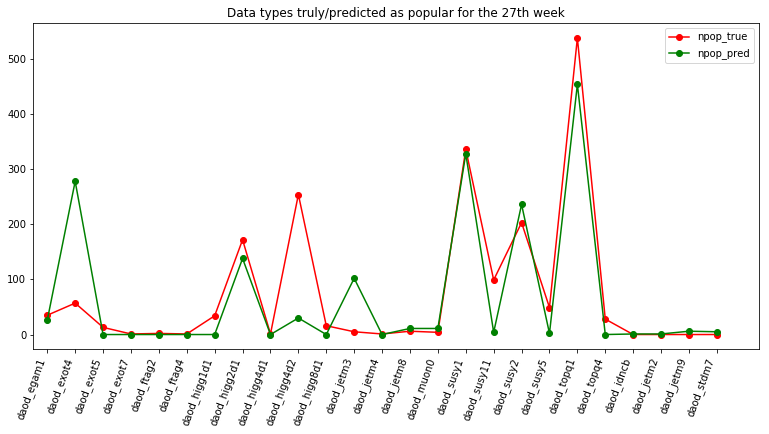

In [2282]:
ax = df_final_type.npop_true.plot(marker = 'o', label = 'npop_true', figsize = (13, 6), color = 'r')
df_final_type.npop_pred.plot(ax=ax, marker = 'o', label = 'npop_pred', color = 'g')
plt.title('Data types truly/predicted as popular for the 27th week')
plt.legend(loc = 'best')
plt.xticks(df_final_type.index, df_final_type.feature, rotation = 70, ha='right')
plt.xlim([-0.5, 25.5])

In [2283]:
df_final_scope

,feature,npop_true,npop_pred
0,data15_13tev,463.0,465.0
1,data16_13tev,345.0,262.0
2,mc15_13tev,1047.0,906.0


(-80, 1100)

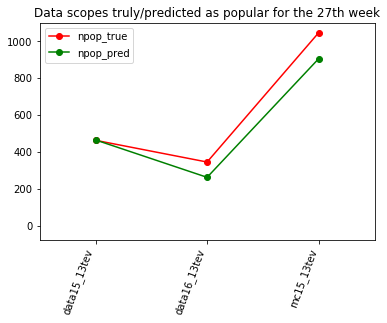

In [2284]:
ax = df_final_scope.npop_true.plot(marker = 'o', label = 'npop_true', color = 'r')
df_final_scope.npop_pred.plot(ax=ax, marker = 'o', label = 'npop_pred', color = 'g')
plt.title('Data scopes truly/predicted as popular for the 27th week')
plt.legend(loc = 'best')
plt.xticks(df_final_scope.index, df_final_scope.feature, rotation = 70, ha='right')
plt.xlim([-0.5, 2.5])
plt.ylim([-80, 1100])

In [1262]:
index_exot_pred = np.array(np.where((bdt.predict(X) == 1) & (X[:,22] == 1)))

In [1263]:
index_exot_pred = index_exot_pred.sum(axis = 0)

In [1268]:
index_exot_pred

array([  4139,   4367,   4741,   4969,   5198,   5428,   5812,   6042,
         6271,   6499,   7337,   7568,   7796,   8177,   8484,   8750,
         8980,   9209,   9437,   9666,   9894,  10415,  10647,  10878,
        11113,  11343,  11571,  11781,  11970,  12201,  12504,  12733,
        12961,  13190,  13418,  13685,  13909,  14215,  14443,  14707,
        14933,  15159,  15385,  15610,  16138,  16576,  16803,  17846,
        18109,  18335,  18555,  18779,  19001,  19264,  19495,  19737,
        19979,  20220,  20461,  20715,  20980,  21199,  21418,  21636,
        21989,  22755,  22988,  23128,  23272,  23419,  23566,  23709,
        23853,  23979,  24078,  24177,  24276,  24375,  24475,  24643,
        25047,  25137,  25272,  25341,  25408,  25476,  25531,  25587,
        25644,  25701,  25759,  25813,  25869,  25926,  25984,  29838,
        29853,  29868,  46710,  46793,  46878,  46962,  47125,  91490,
        91545,  91601,  91659,  91716,  91774,  91830,  91887,  91944,
      

In [1264]:
df_1sem2016.loc[index_exot_pred]['dsid'].value_counts()

410000    14
410012     3
410013     3
410014     3
410011     3
363338     1
279813     1
297730     1
363464     1
300800     1
280319     1
300279     1
279284     1
363392     1
300784     1
279279     1
299243     1
363459     1
281317     1
363394     1
279259     1
276689     1
298690     1
298687     1
363367     1
363475     1
363456     1
280753     1
299184     1
280231     1
          ..
363380     1
363381     1
280464     1
363407     1
363406     1
363405     1
363404     1
363374     1
363402     1
363401     1
363400     1
363399     1
363398     1
363397     1
363396     1
363395     1
300418     1
363393     1
278912     1
300415     1
363390     1
363389     1
279932     1
363387     1
363386     1
363372     1
279928     1
363383     1
280950     1
282625     1
Name: dsid, Length: 256, dtype: int64

In [1265]:
df_1sem2016.loc[index_exot_pred]['ptag'].value_counts()

2666    182
2667     95
Name: ptag, dtype: int64

In [1266]:
index_exot_true = np.array(np.where((Y == 1) & (X[:,22] == 1)))

In [1270]:
index_exot_true = index_exot_true.sum(axis=0)

In [1271]:
index_exot_true

array([ 20220,  25047,  46793,  93765,  93804,  93893,  94859,  94918,
        95154,  95330,  96380,  96438,  96611,  96731,  96953,  98328,
        98374,  98421,  98468,  98514,  98562,  98609,  98656,  98703,
        98749,  98796,  99460,  99507,  99554,  99601,  99647,  99693,
        99740,  99784,  99830,  99876,  99969, 100016, 100109, 100155,
       112784, 112785, 112786, 112787, 112788, 112789, 112791, 112792,
       112793, 112794, 112795, 112796, 112797, 117743, 118457, 118809,
       118810])

In [1273]:
df_1sem2016.loc[index_exot_true]['dsid'].value_counts()

410000    13
410014     2
363391     1
363467     1
363396     1
363475     1
363474     1
363472     1
363471     1
363469     1
363468     1
363338     1
363466     1
363463     1
363336     1
363335     1
363462     1
363461     1
283780     1
363394     1
363436     1
410011     1
363460     1
363390     1
363441     1
361082     1
363400     1
410013     1
363446     1
363445     1
363444     1
363443     1
363442     1
363440     1
363464     1
363439     1
363438     1
363437     1
363372     1
363465     1
363369     1
363365     1
363364     1
299584     1
Name: dsid, dtype: int64

In [1274]:
df_1sem2016.loc[index_exot_true]['ptag'].value_counts()

2666    55
2667     2
Name: ptag, dtype: int64

In [1294]:
sett_true = X[index_exot_true, :][:,[i for i in range(114,139)]]

In [1365]:
sett_true[:, 21]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.])

In [1303]:
sett_pred = X[index_exot_pred, :][:,[i for i in range(114,139)]]

In [1366]:
sett_pred[:, 21]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [1317]:
df_1sem2016.loc[index_exot_true]['scope'].value_counts()

mc15_13TeV      55
data16_13TeV     1
data15_13TeV     1
Name: scope, dtype: int64

In [1319]:
df_1sem2016.loc[index_exot_pred]['scope'].value_counts()

mc15_13TeV      182
data15_13TeV     65
data16_13TeV     30
Name: scope, dtype: int64

In [ ]:
TP 294 FP 38 TN 9974 FN 158
Sensitivity, hit rate, recall, or true positive rate 0.65
Specificity or true negative rate 0.996
Precision or positive predictive value 0.886
Negative predictive value 0.984
Fall out or false positive rate 0.004
False negative rate 0.35               # 2 weeks user (4.1 %)
False discovery rate 0.114
overall accuracy 0.981


In [ ]:
TP 745 FP 122 TN 10240 FN 462
Sensitivity, hit rate, recall, or true positive rate 0.617
Specificity or true negative rate 0.988
Precision or positive predictive value 0.859
Negative predictive value 0.957
Fall out or false positive rate 0.012
False negative rate 0.383              # other month (10 %)
False discovery rate 0.141
overall accuracy 0.95

In [ ]:
TP 340 FP 57 TN 11024 FN 148
Sensitivity, hit rate, recall, or true positive rate 0.697
Specificity or true negative rate 0.995
Precision or positive predictive value 0.856
Negative predictive value 0.987
Fall out or false positive rate 0.005
False negative rate 0.303           # other month (4.3 %)
False discovery rate 0.144
overall accuracy 0.982


In [ ]:
TP 280 FP 53 TN 11145 FN 91
Sensitivity, hit rate, recall, or true positive rate 0.755
Specificity or true negative rate 0.995
Precision or positive predictive value 0.841
Negative predictive value 0.992
Fall out or false positive rate 0.005
False negative rate 0.245
False discovery rate 0.159         # other month (3.2 %)
overall accuracy 0.988


In [ ]:
TP 193 FP 37 TN 11292 FN 47
Sensitivity, hit rate, recall, or true positive rate 0.804
Specificity or true negative rate 0.997
Precision or positive predictive value 0.839
Negative predictive value 0.996
Fall out or false positive rate 0.003
False negative rate 0.196
False discovery rate 0.161         # other month (2 %)
overall accuracy 0.993
